# RDS Final Project - Prudential ADS

Brad Zhang (bbz2005) and Justin Chui (yc4561)

# Implementation and Validation

## Importing Modules

In [1]:
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
import warnings
from mlxtend.classifier import StackingClassifier
import missingno as msno
from sklearn.ensemble import VotingClassifier
import shap
shap.initjs()
import lime
from lime import lime_tabular
warnings.simplefilter('ignore')
import os
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## Reading Data

In [2]:
insurance_df = pd.read_csv('./train.csv', index_col='Id')
insurance_df.head()

Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
Id                                                                  
2                1             D3              10        0.076923   
5                1             A1              26        0.076923   
6                1             E1              26        0.076923   
7                1             D4              10        0.487179   
8                1             D2              26        0.230769   

    Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
Id                                                                       
2                2               1               1  0.641791  0.581818   
5                2               3               1  0.059701  0.600000   
6                2               3               1  0.029851  0.745455   
7                2               3               1  0.164179  0.672727   
8                2               3               1  0.417910  0.654545   

          Wt  ...  Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
Id            ...                                                               
2   0.148536  ...                   0                   0                   0   
5   0.131799  ...                   0                   0                   0   
6   0.288703  ...                   0                   0                   0   
7   0.205021  ...                   0                   0                   0   
8   0.234310  ...                   0                   0                   0   

    Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
Id                                                               
2                    0                   0                   0   
5                    0                   0                   0   
6                    0                   0                   0   
7                    0                   0                   0   
8                    0                   0                   0   

    Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
Id                                                                        
2                    0                   0                   0         8  
5                    0                   0                   0         4  
6                    0                   0                   0         8  
7                    0                   0                   0         8  
8                    0                   0                   0         8  

[5 rows x 127 columns]

## Shape

In [3]:
insurance_df.shape

(59381, 127)

## Distribution of Target Variable

In [4]:
insurance_df['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

> **Class imbalance can be seen here. Also there 8 categories, lets combine them to 3 categories**

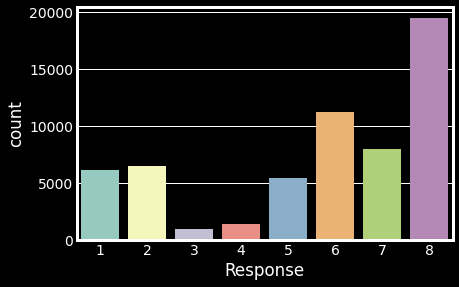

In [5]:
sns.countplot(x=insurance_df['Response']);

**Response 8 has highest values and 3 has the least**

## Processing Target Variable

In [6]:
#Combining the Categores to 3 categories
insurance_df['Modified_Response']  = insurance_df['Response'].apply(lambda x : 0 if x<=7 and x>=0 else (1 if x==8 else -1))

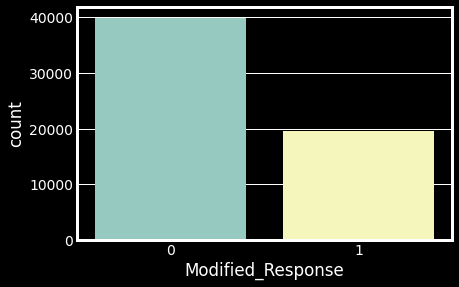

In [7]:
sns.countplot(x= insurance_df['Modified_Response']);

> **Still some imbalance can be seen**

## Removing Old Target Variable

In [8]:
# Dropping old response columns
insurance_df.drop('Response',axis = 1, inplace=True)

## **Making categorical and numerical columns list**

In [9]:
# Making lists with categorical and numerical features.
categorical =  [col for col in insurance_df.columns if insurance_df[col].dtype =='object']

numerical = categorical =  [col for col in insurance_df.columns if insurance_df[col].dtype !='object']

## **Visualizations On Categorical Features**

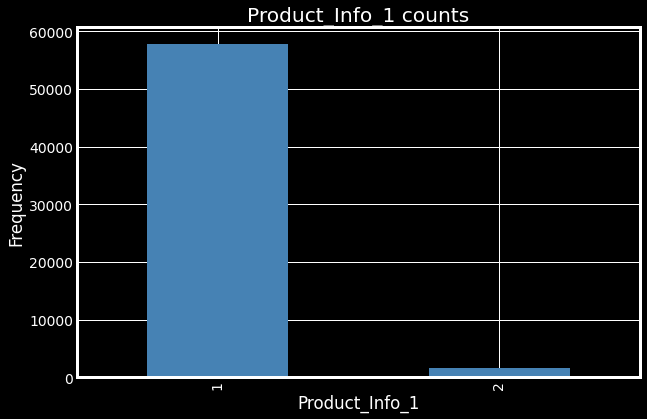

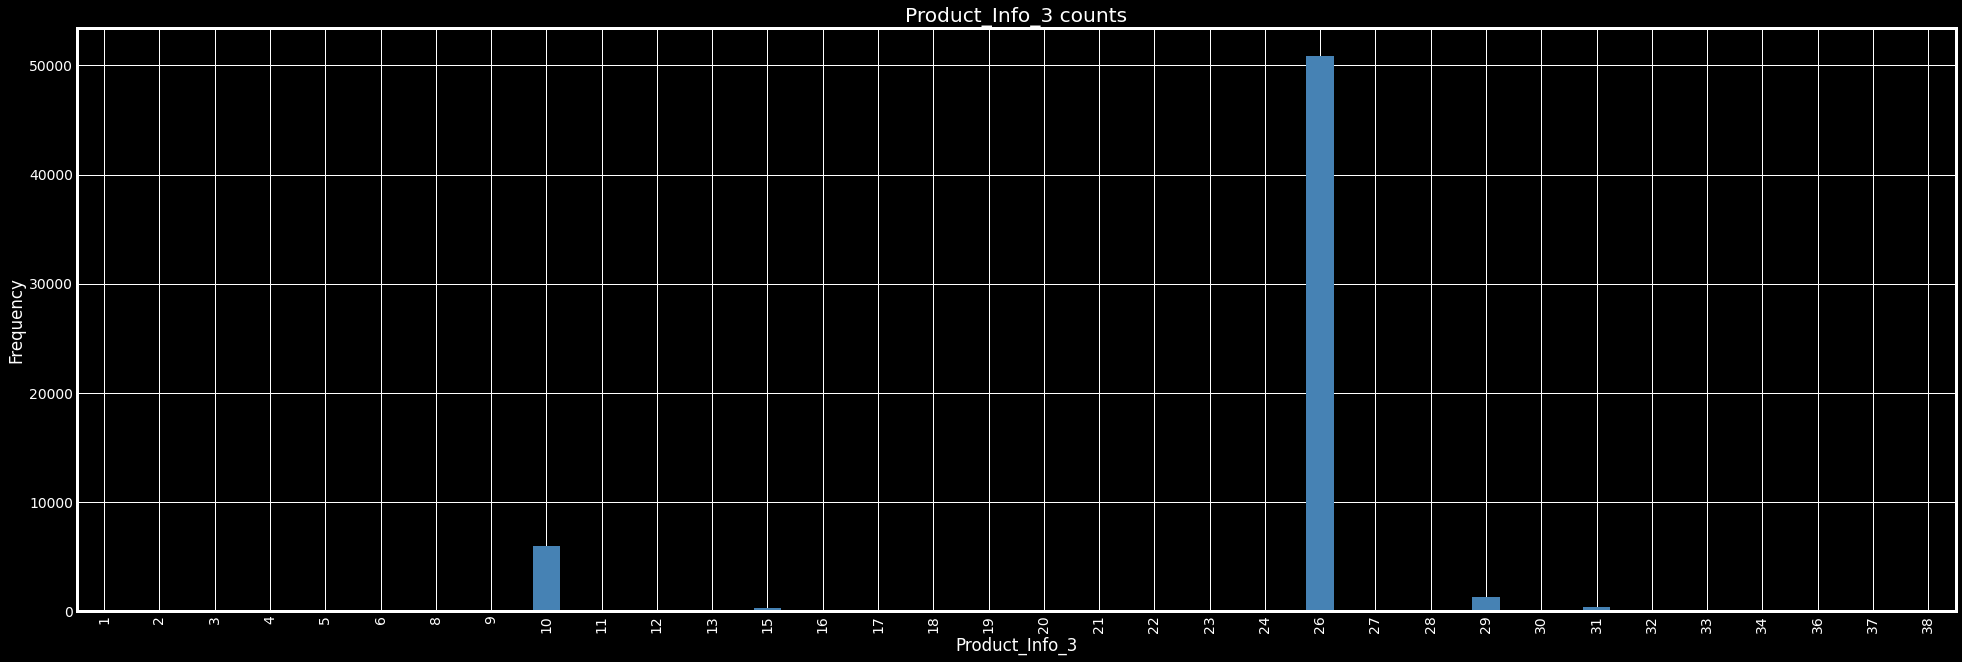

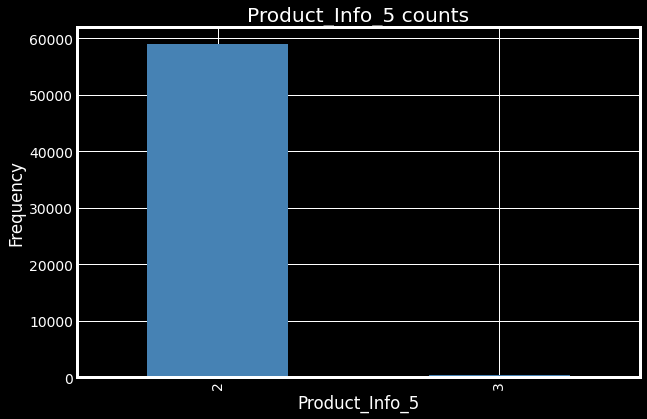

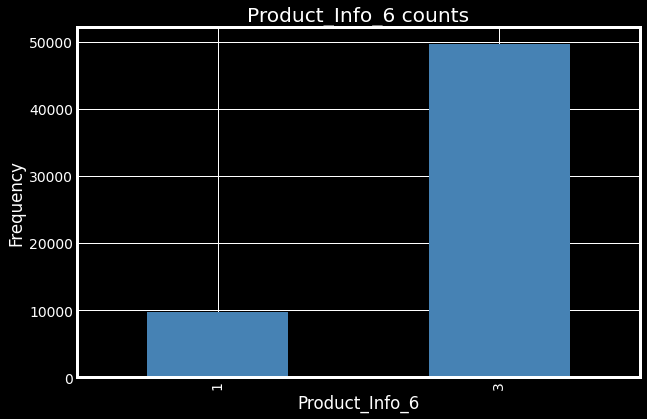

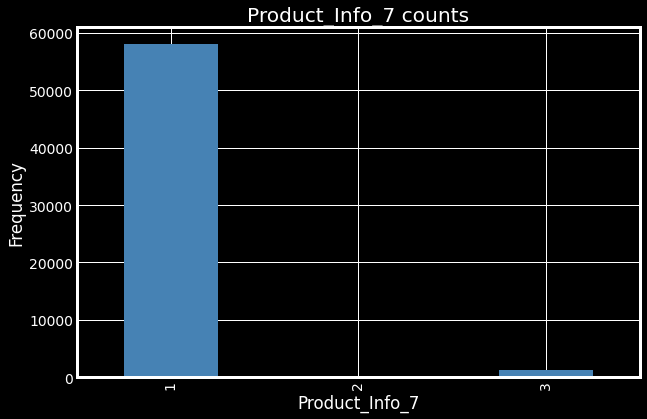

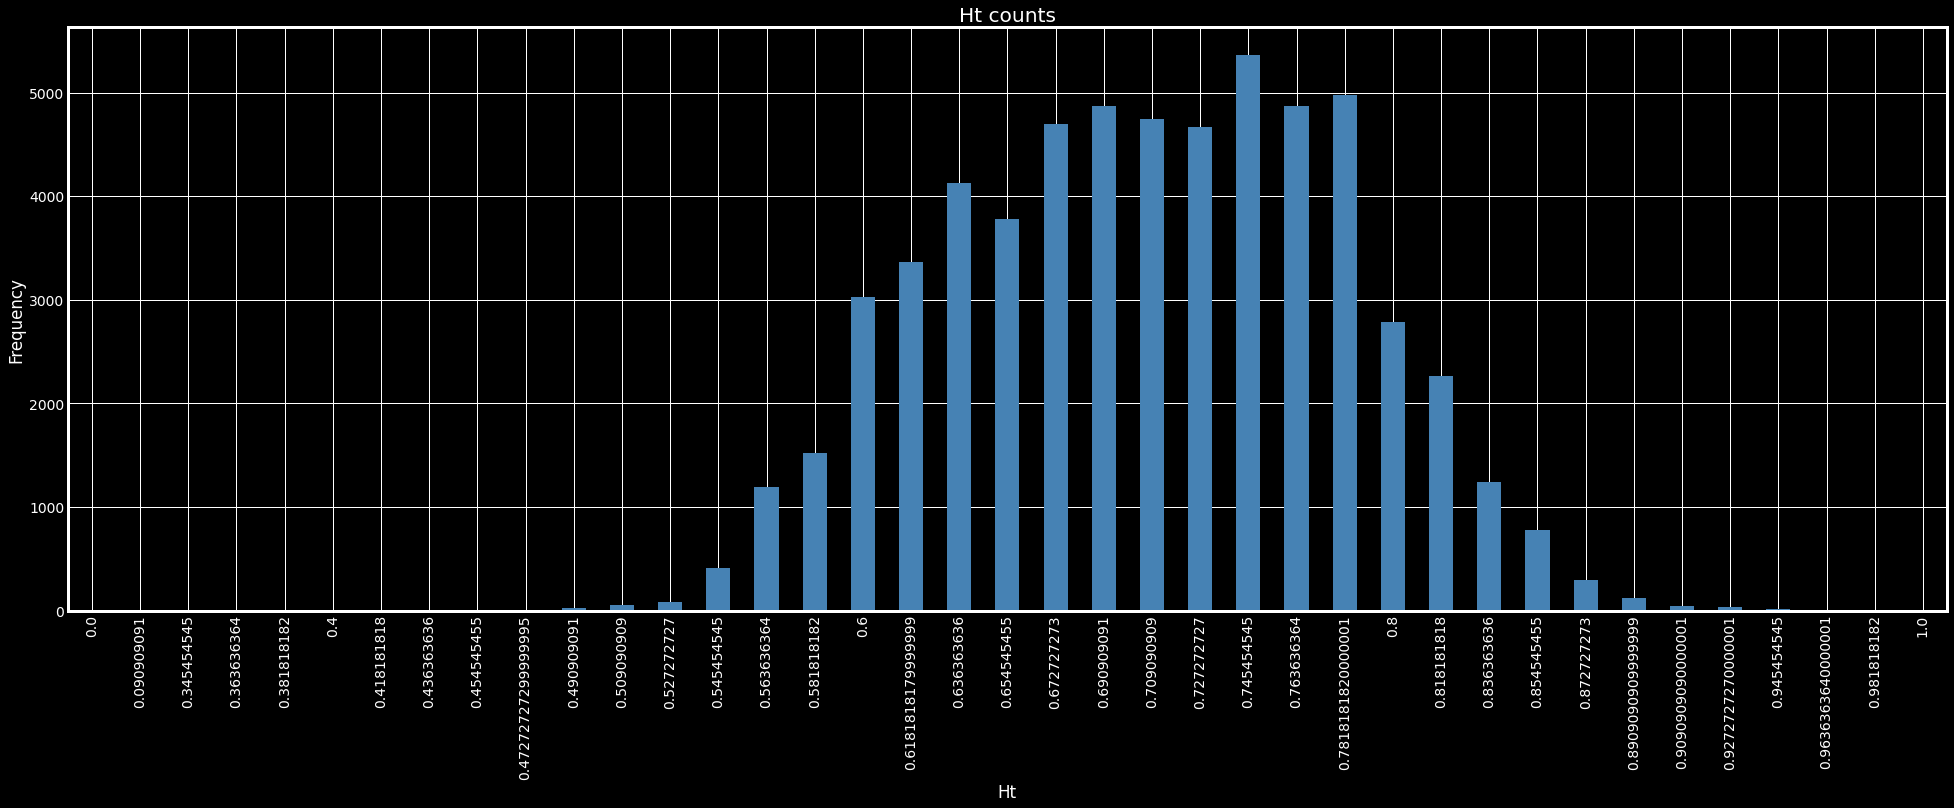

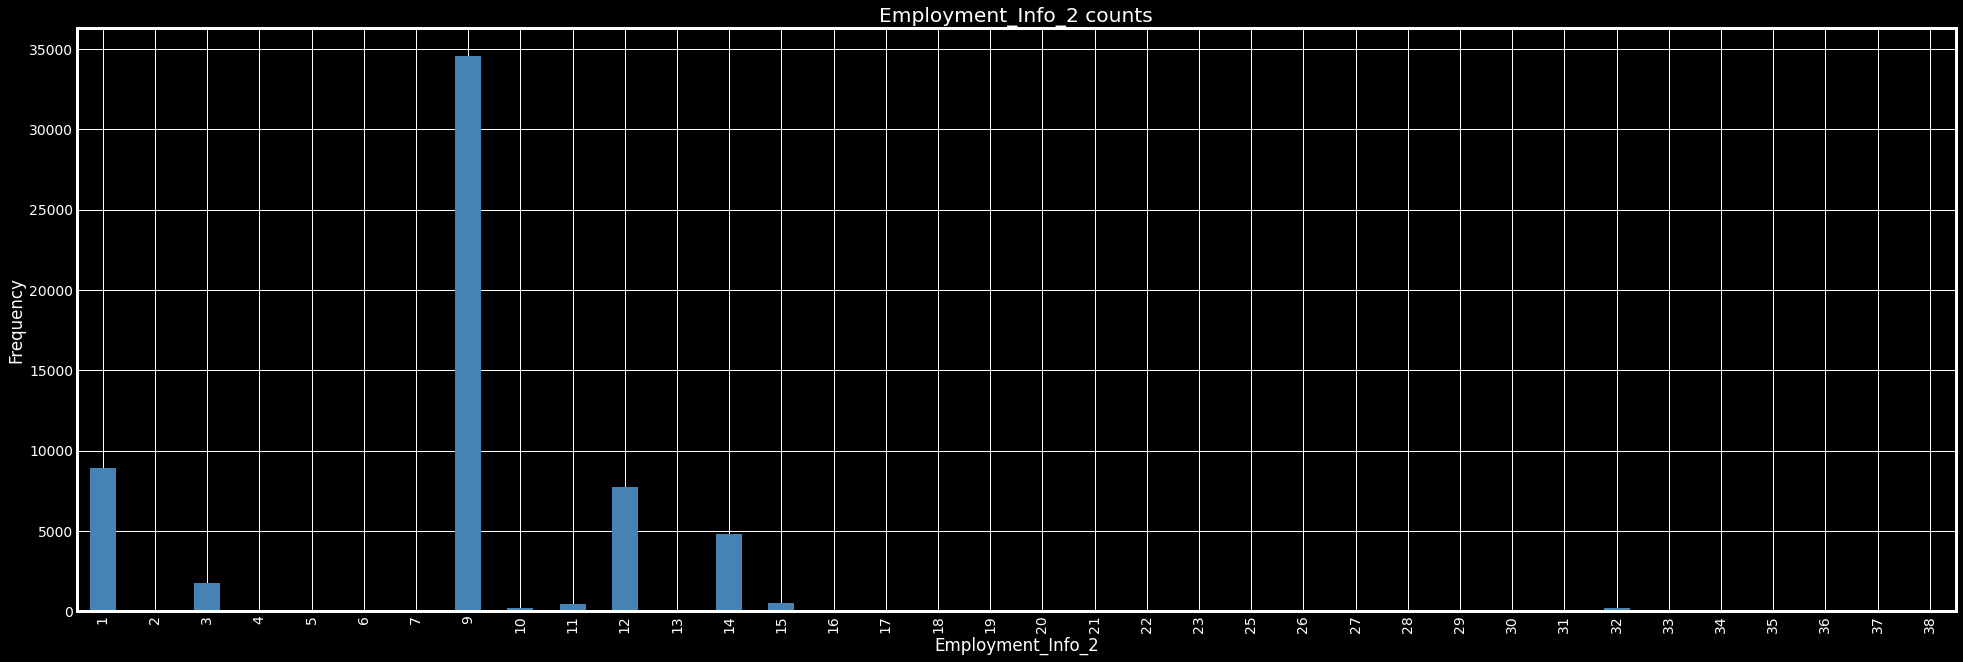

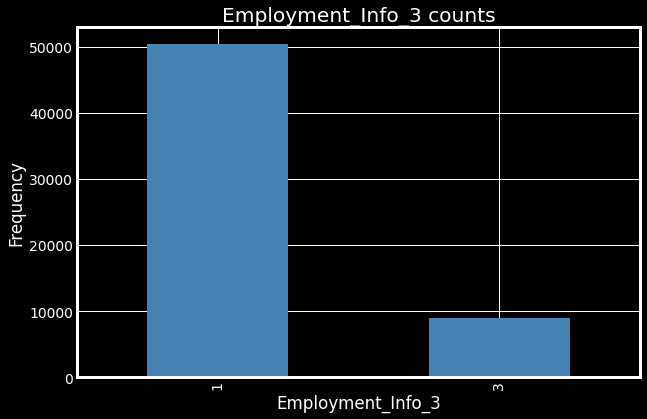

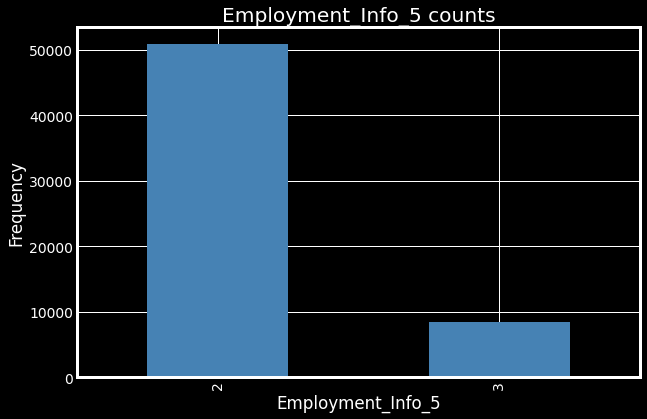

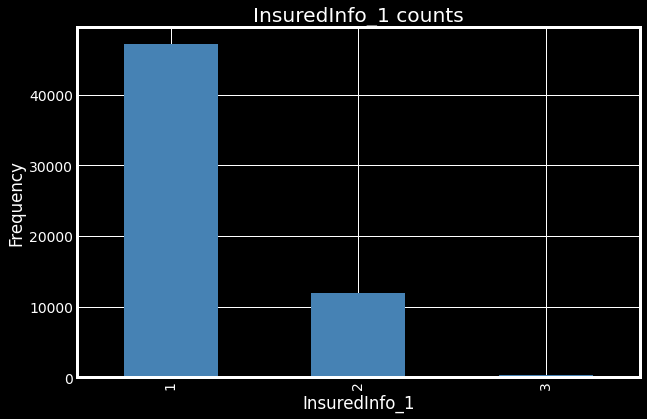

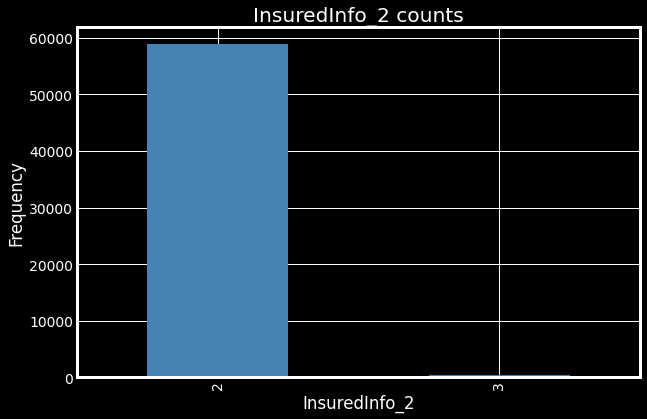

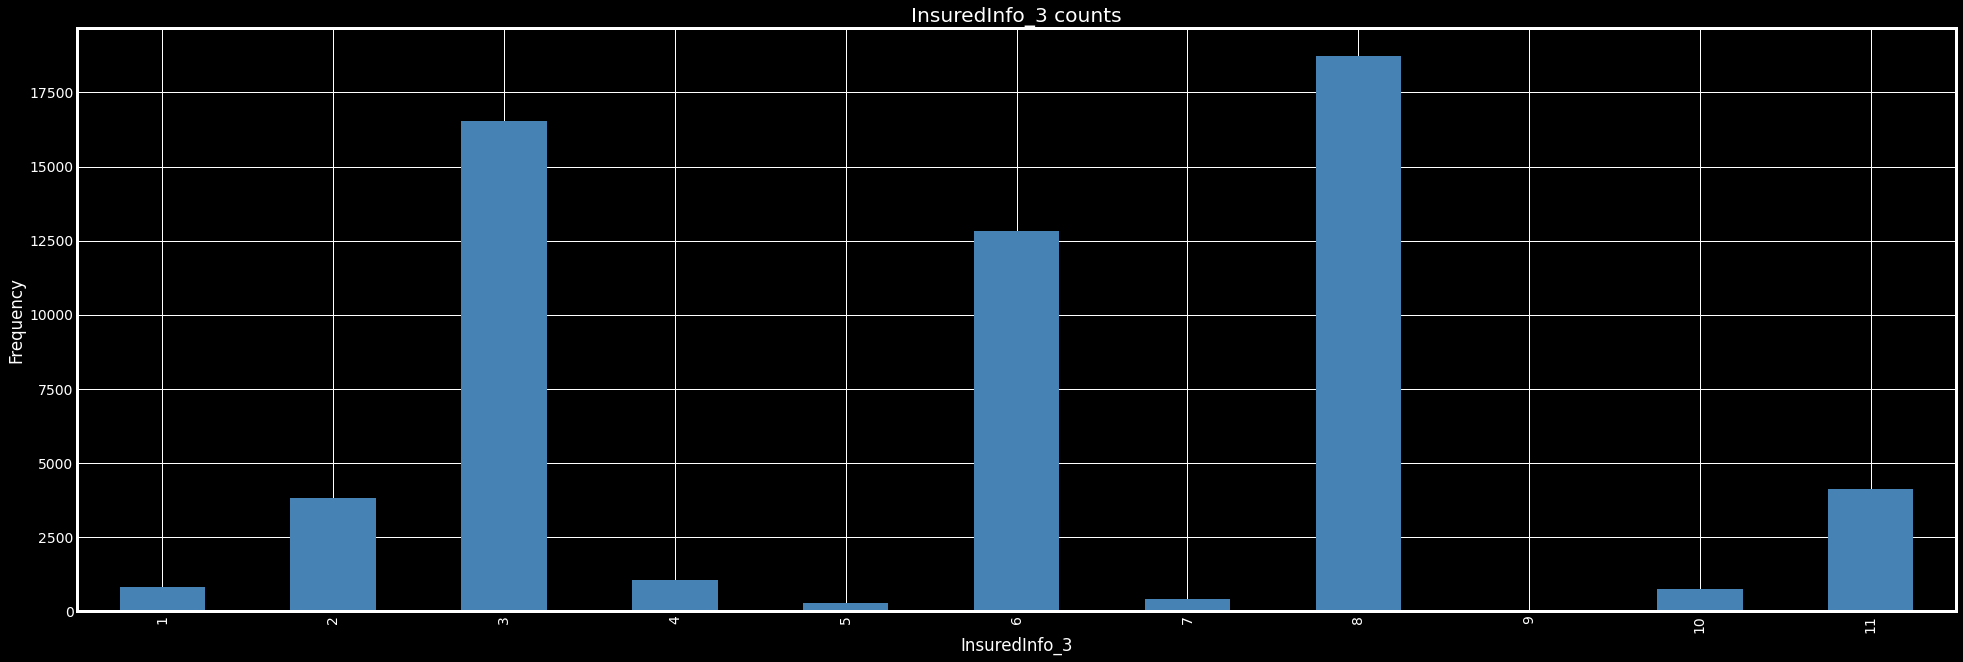

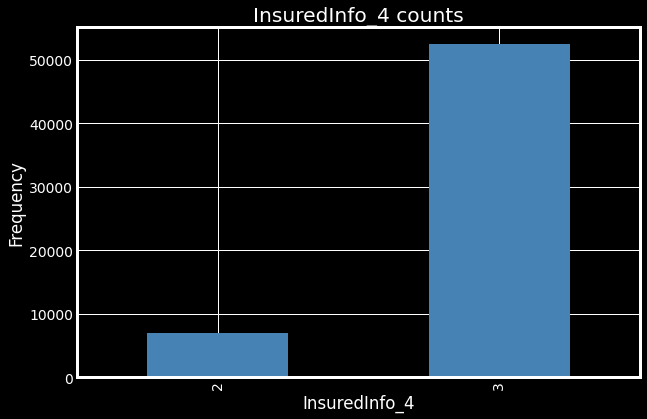

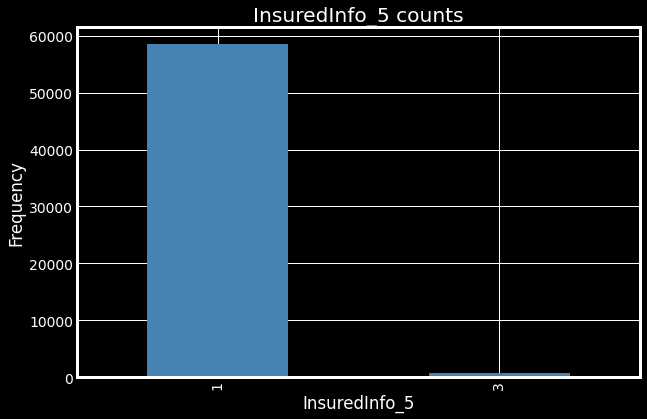

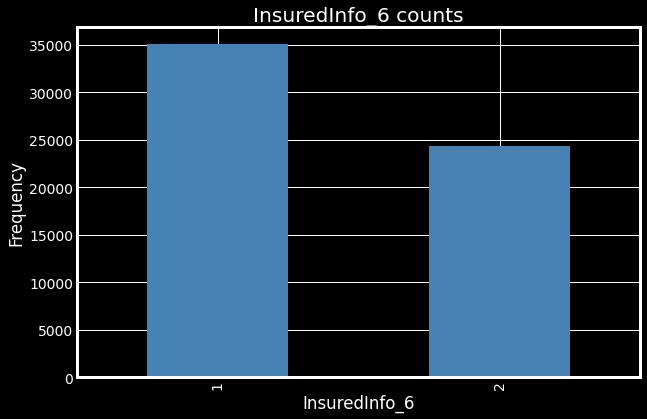

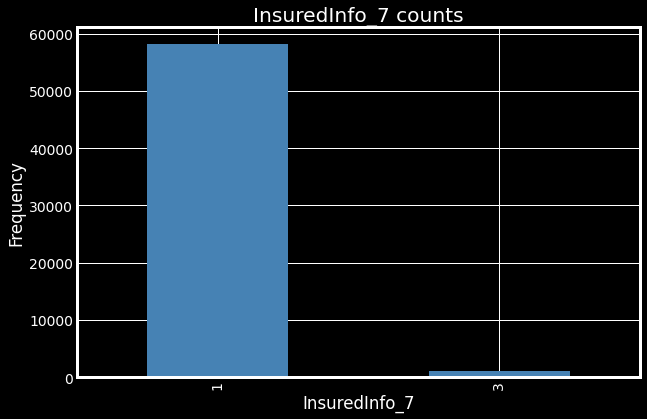

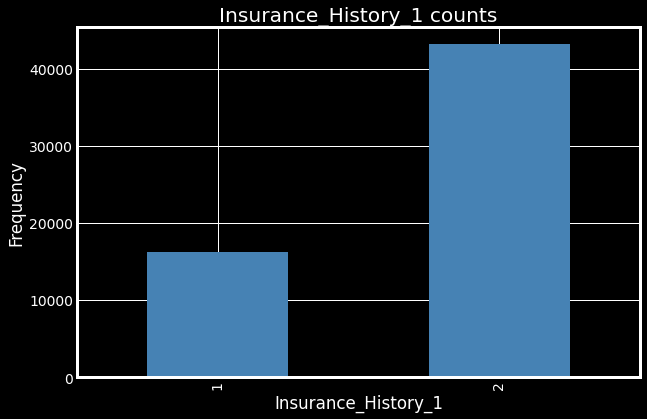

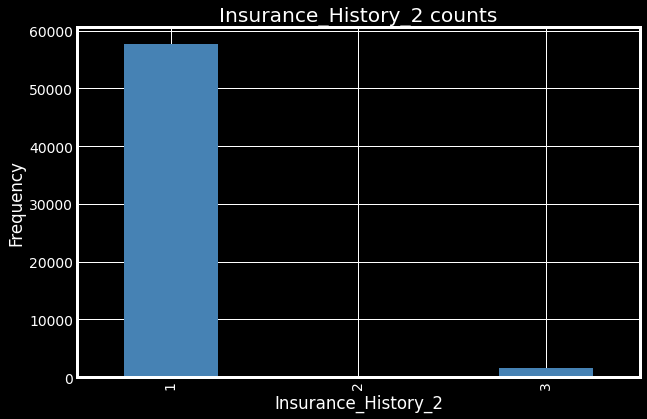

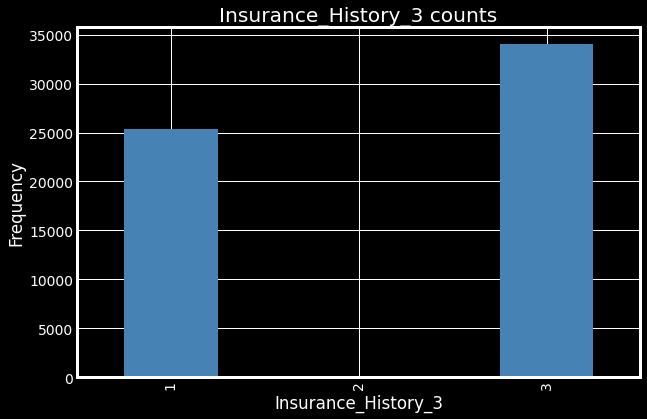

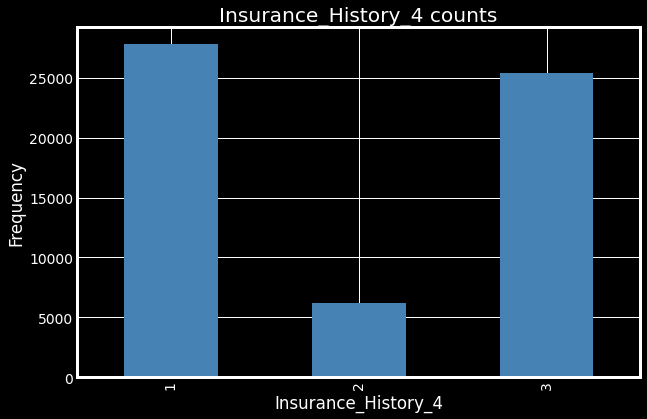

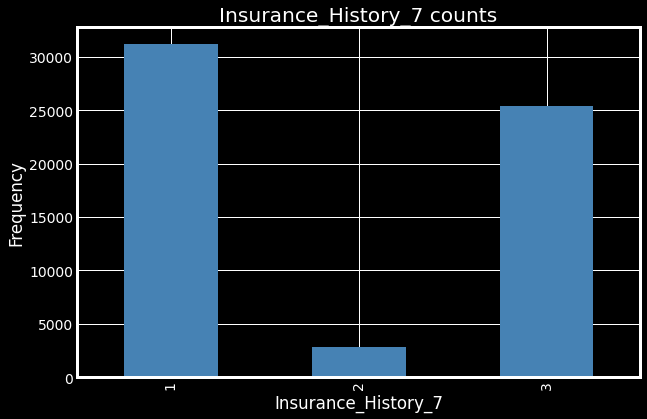

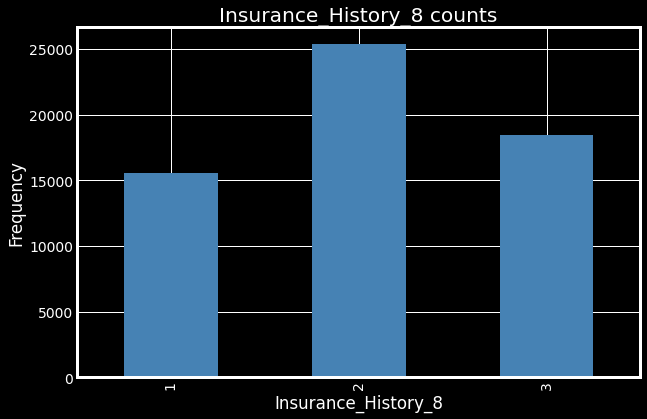

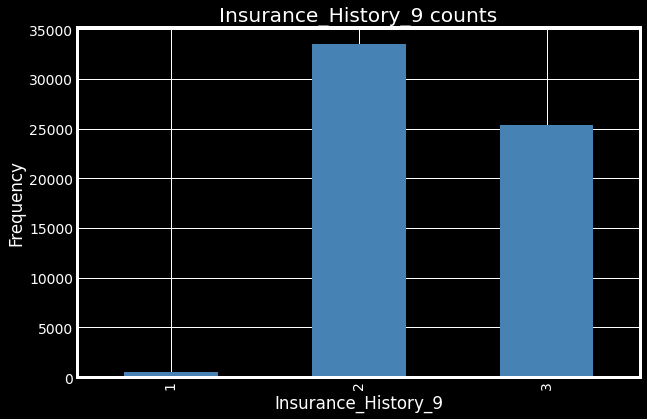

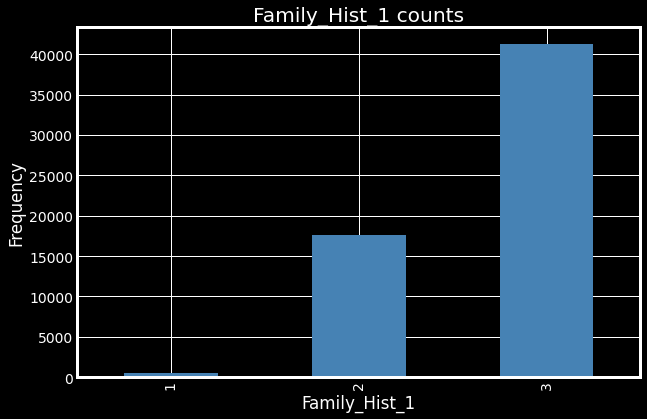

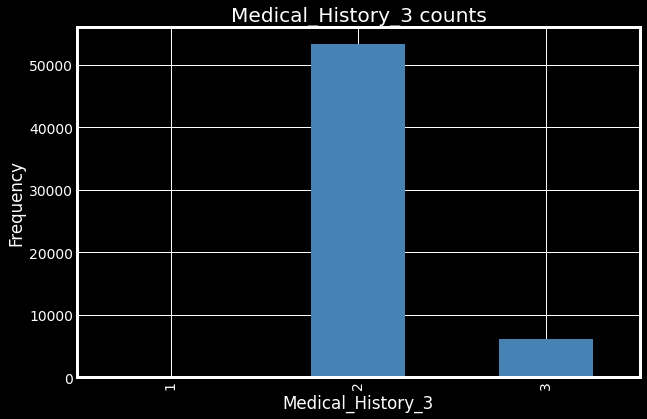

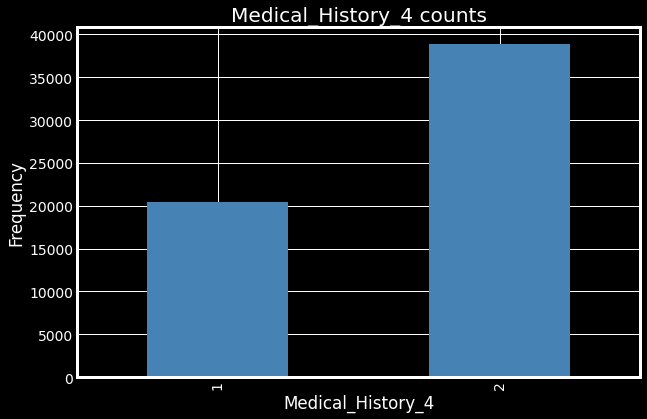

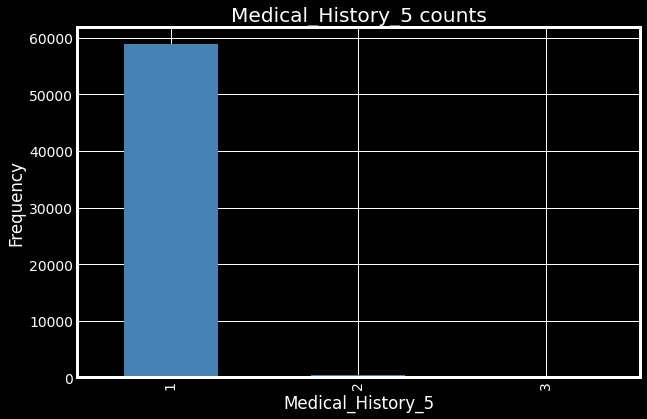

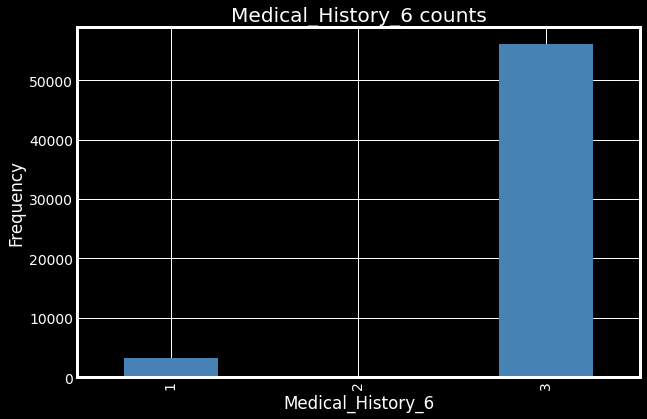

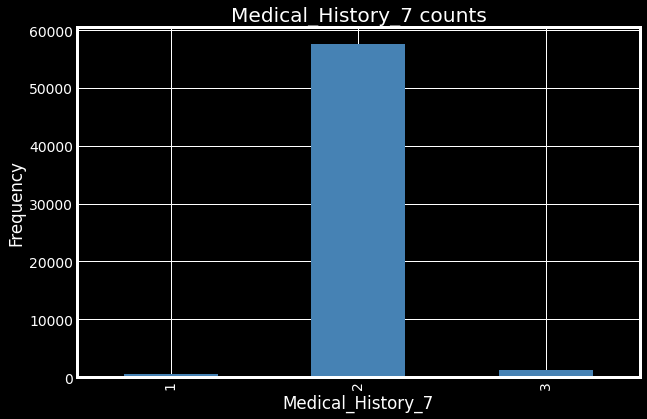

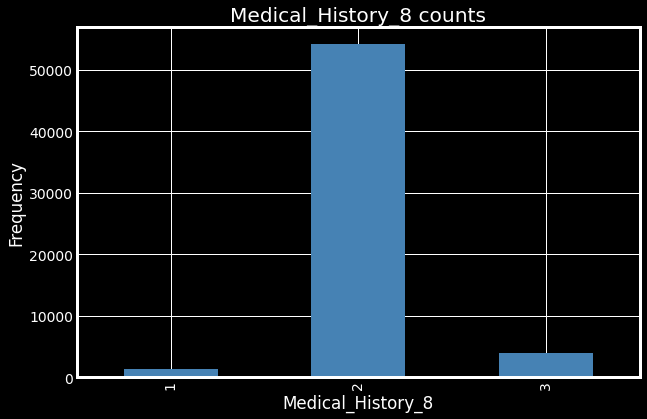

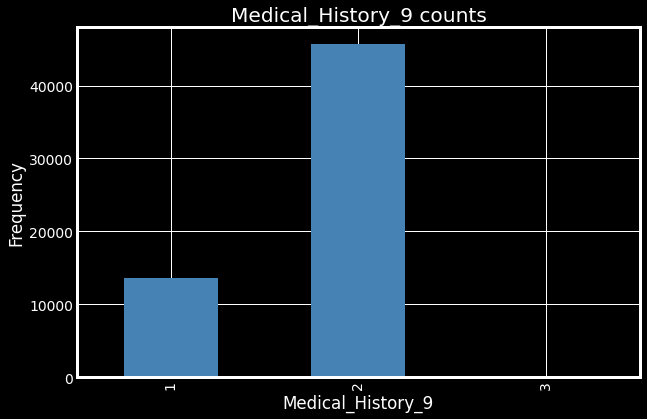

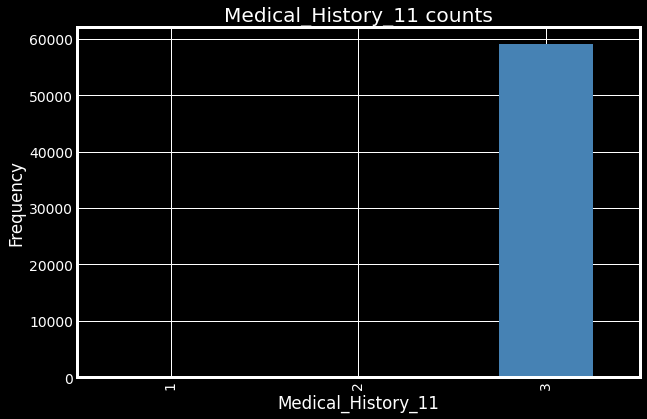

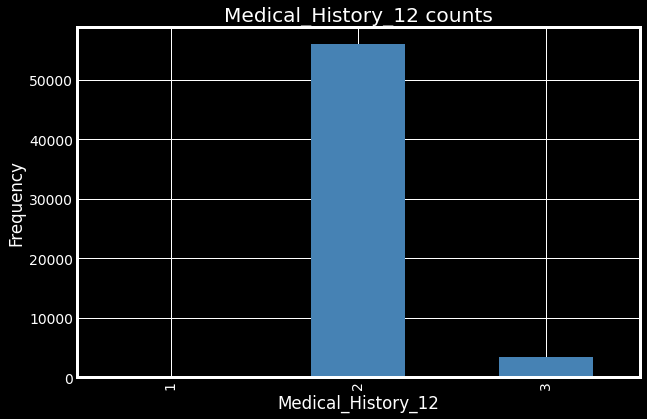

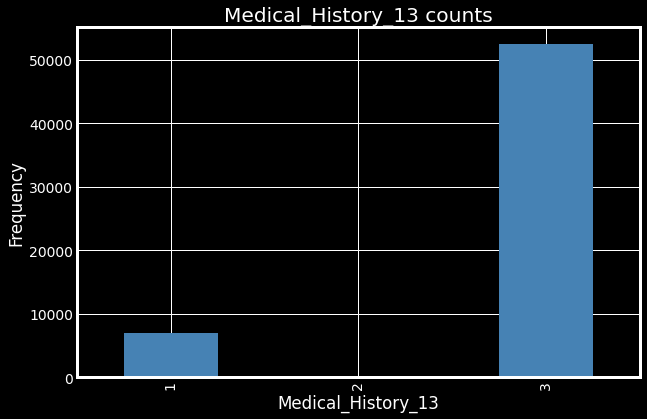

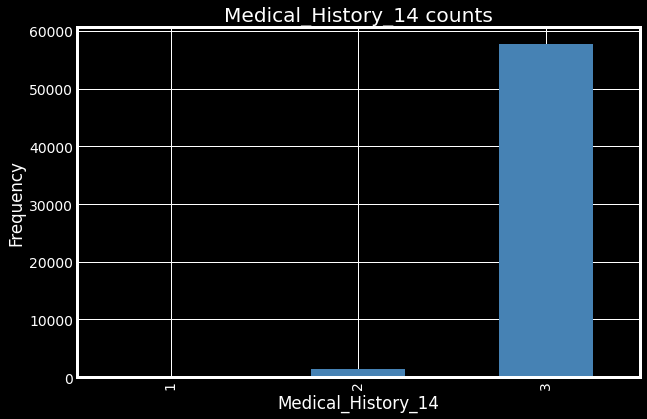

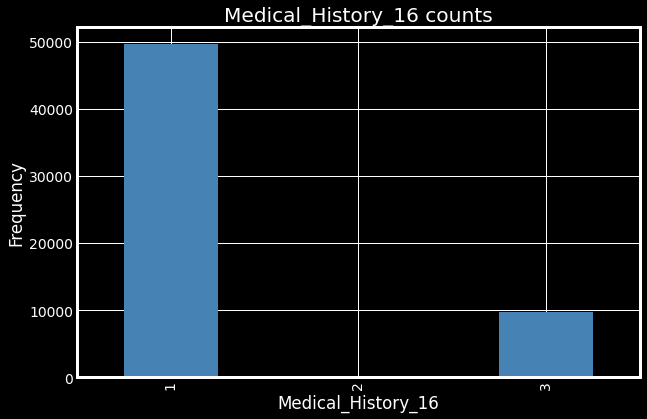

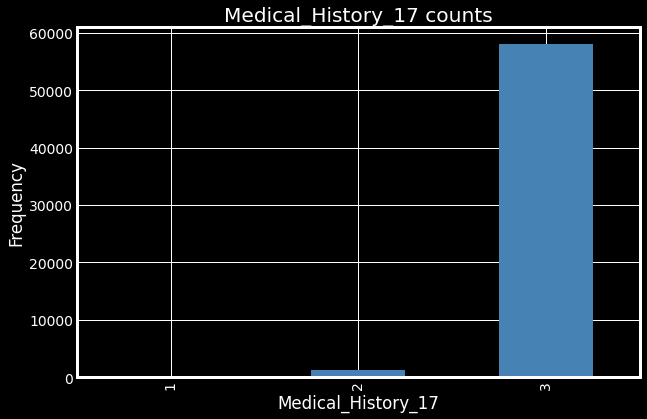

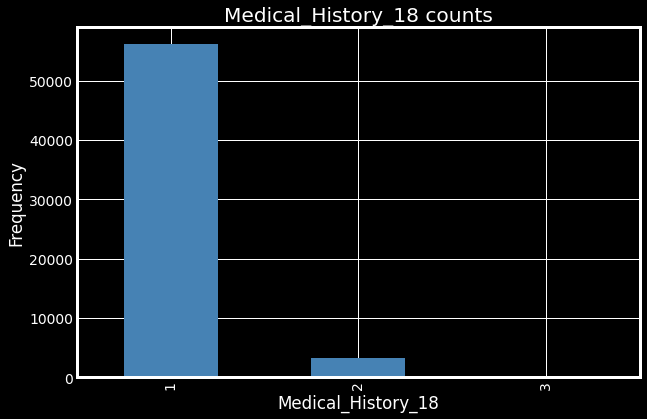

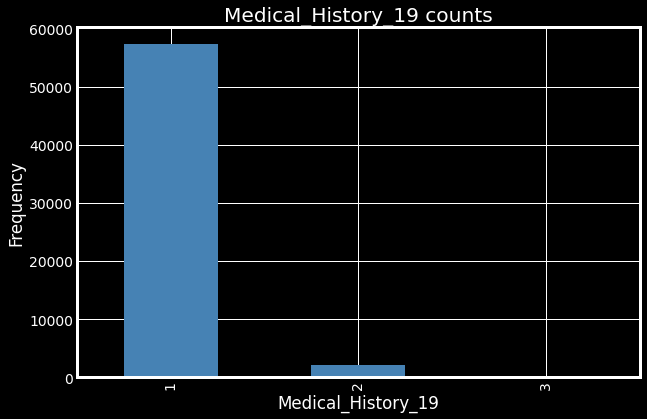

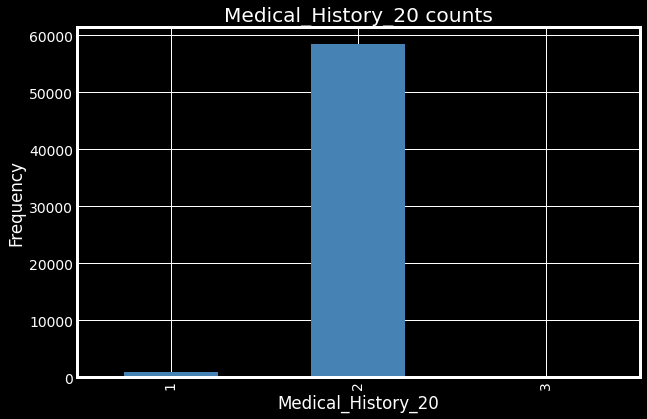

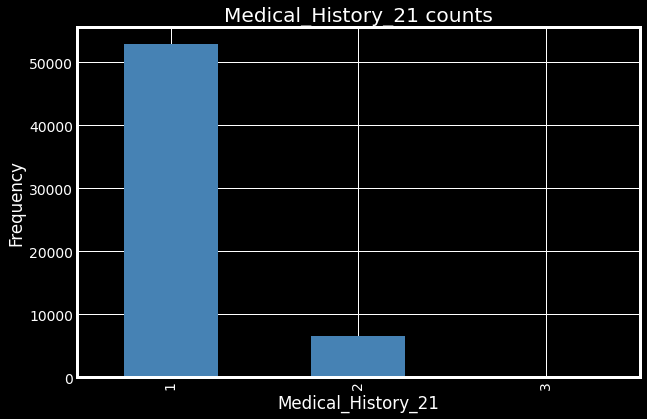

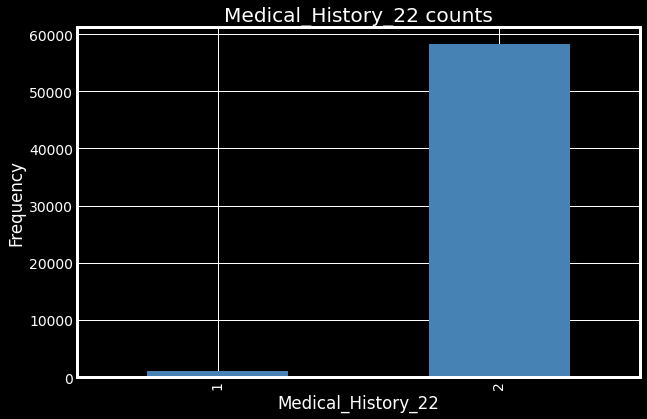

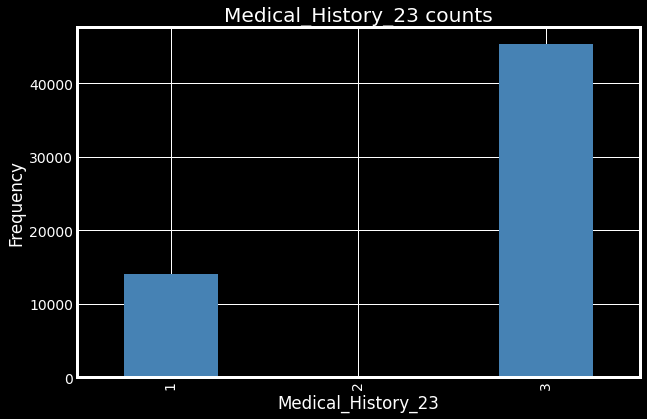

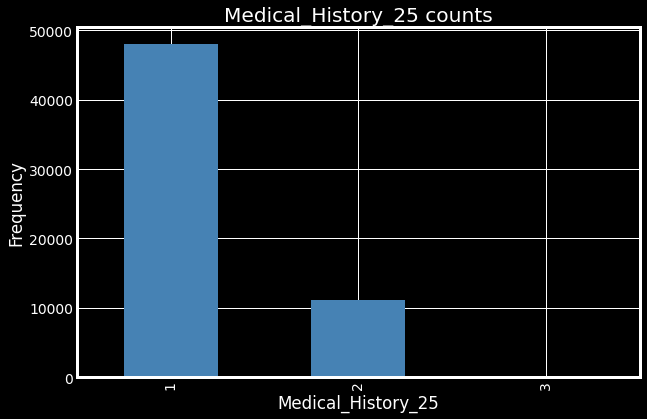

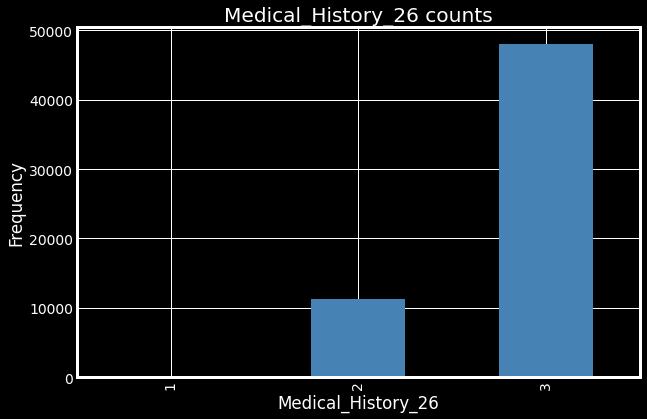

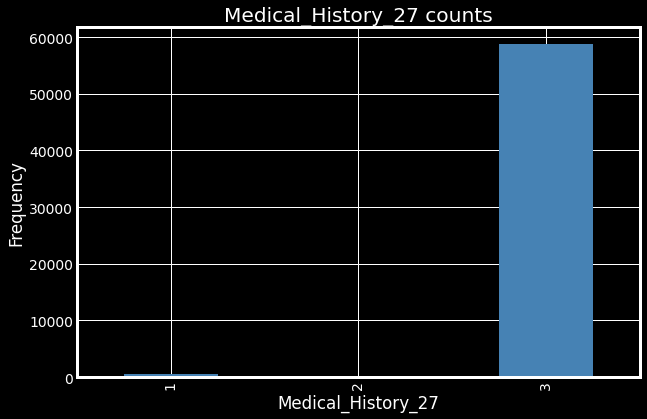

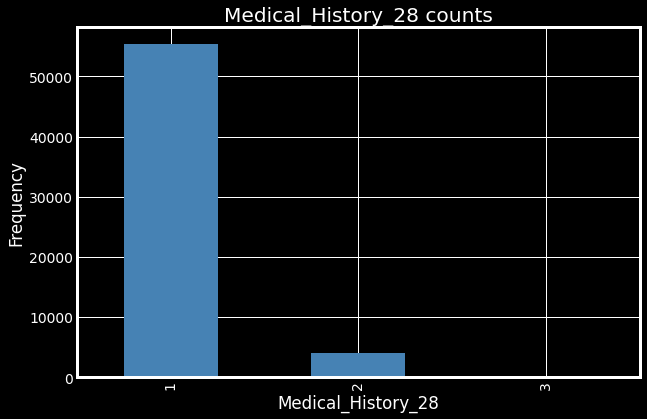

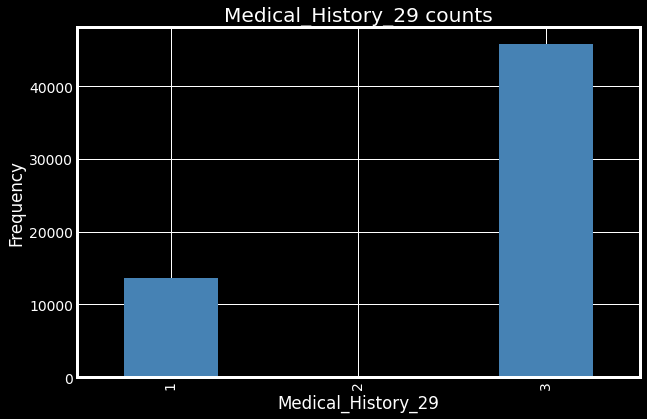

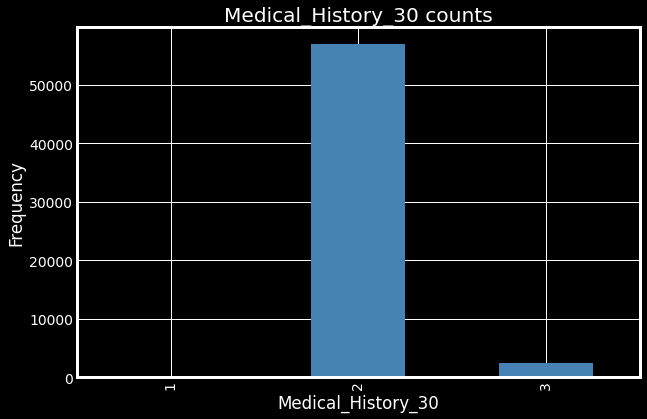

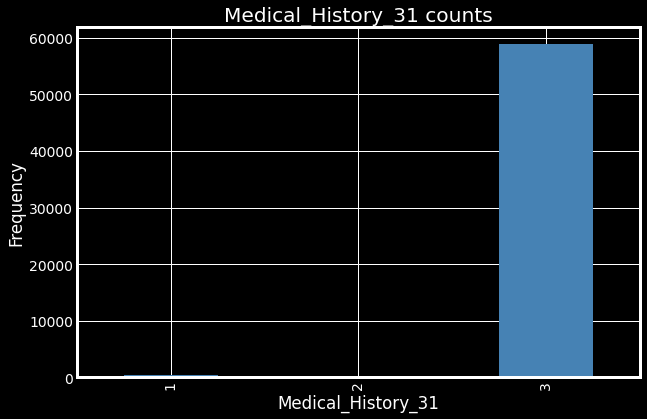

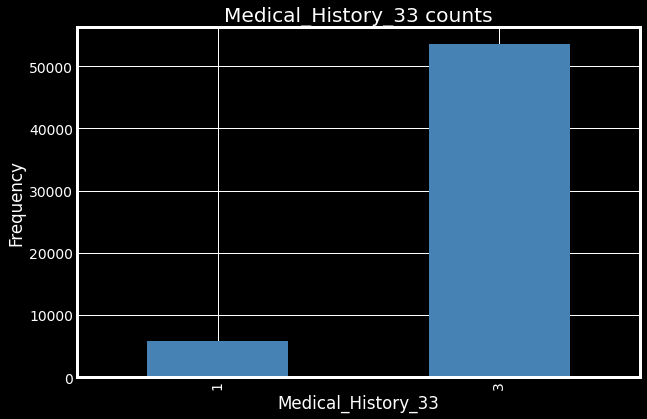

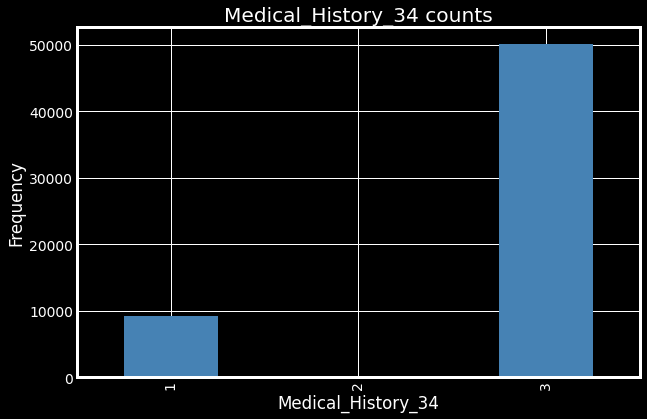

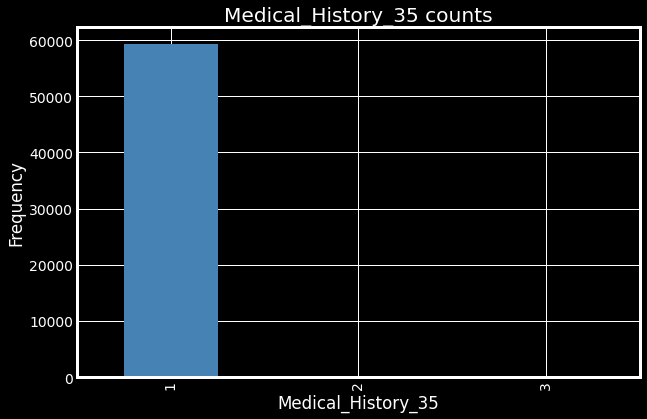

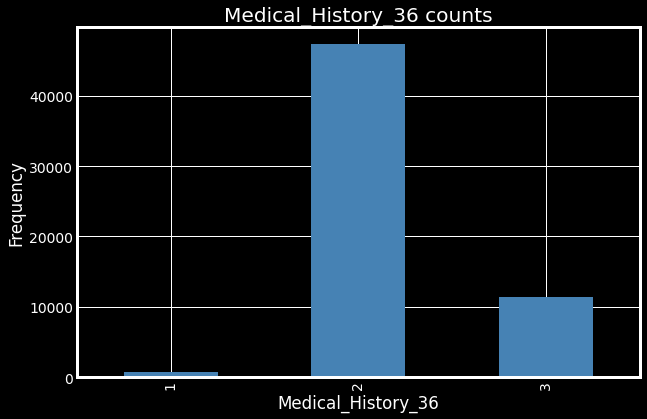

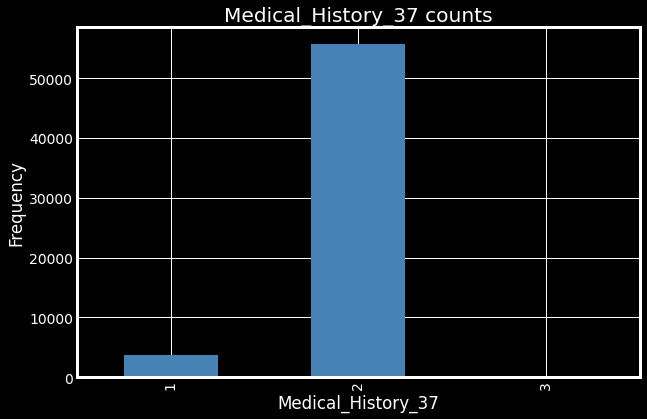

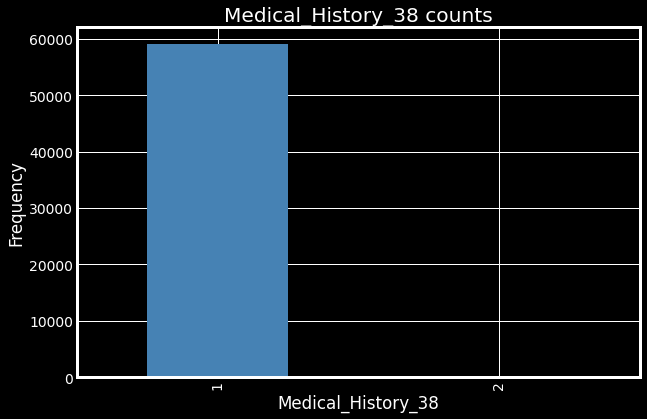

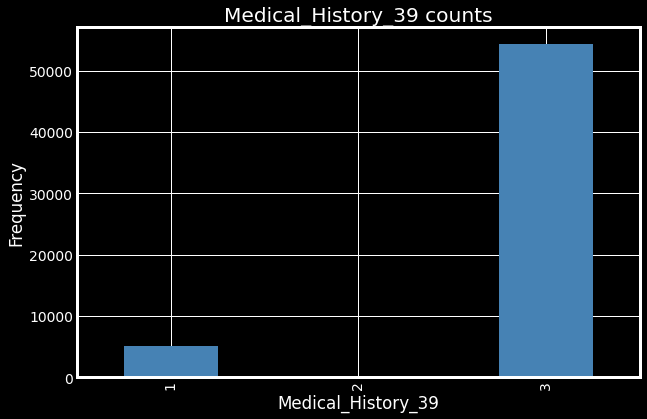

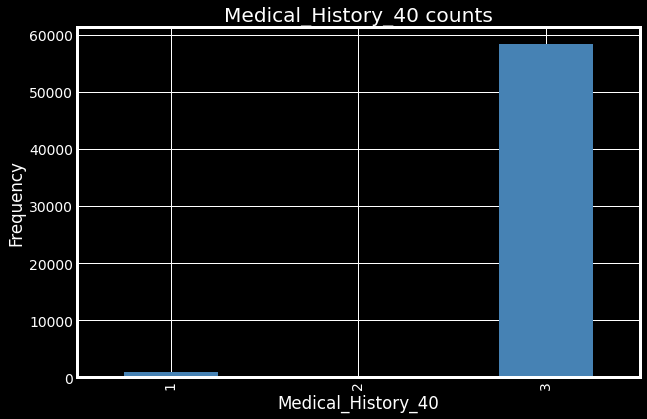

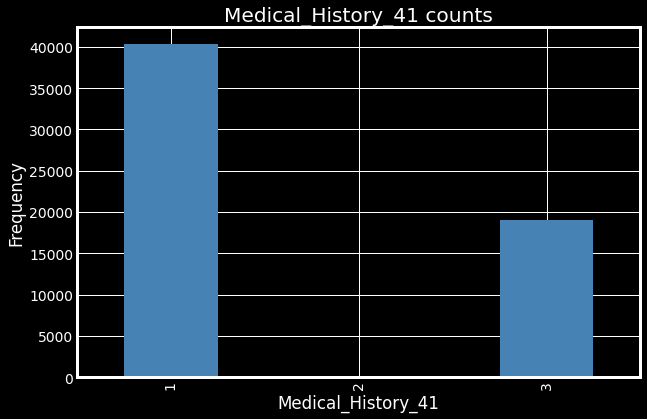

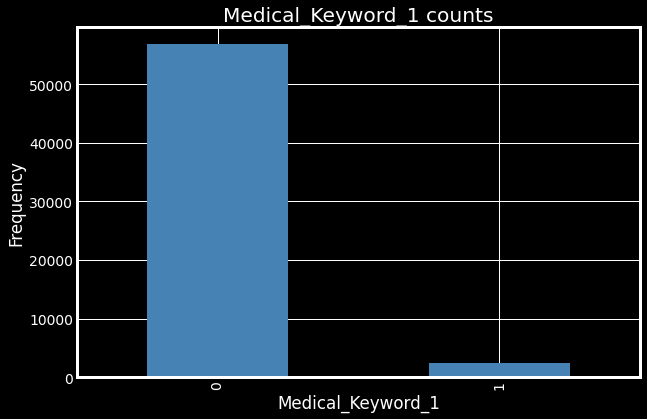

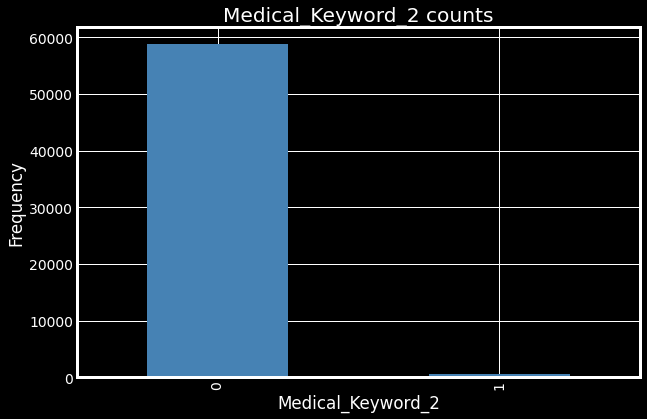

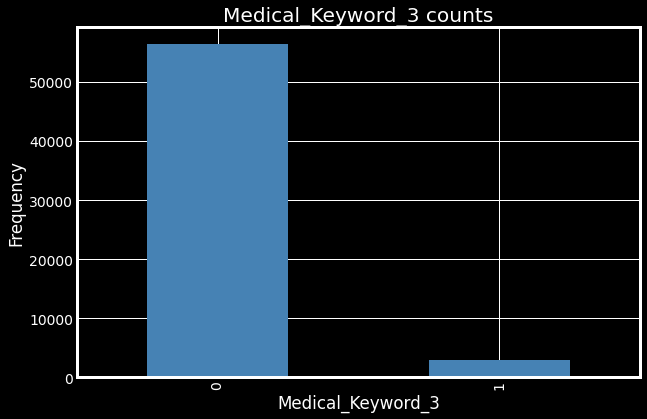

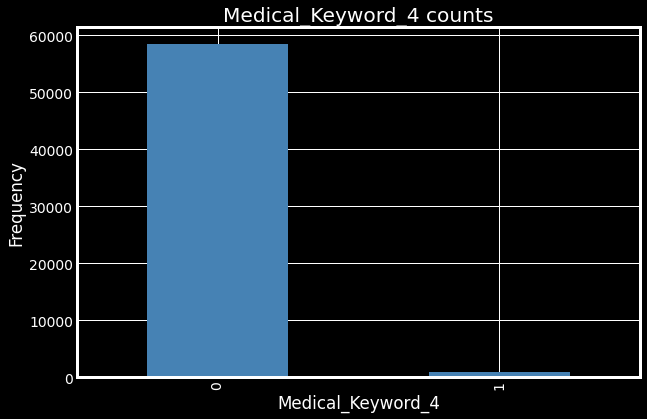

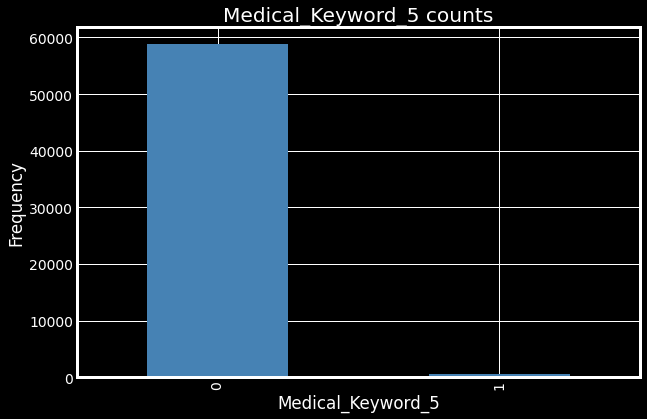

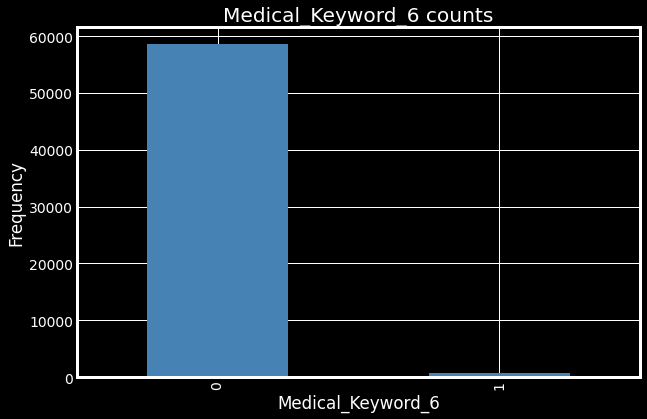

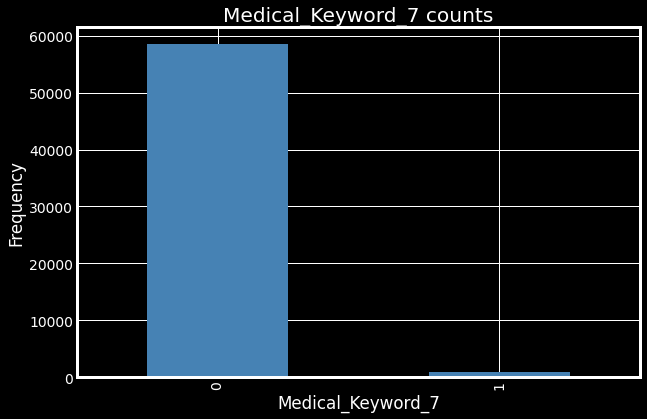

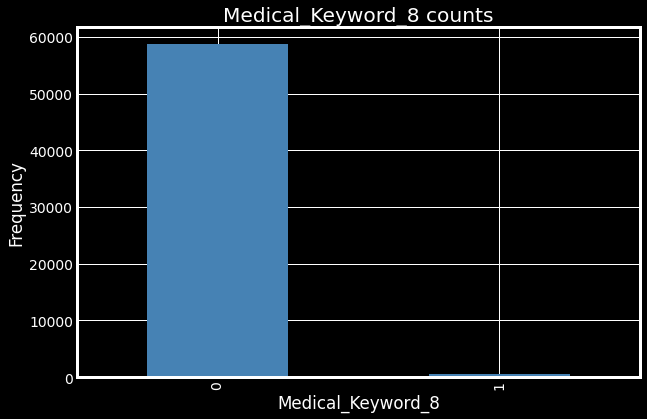

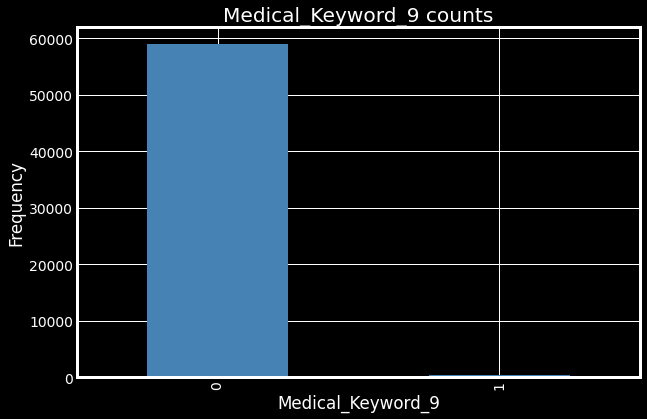

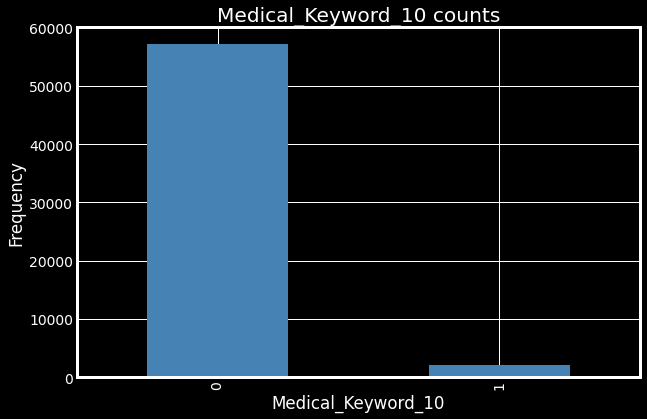

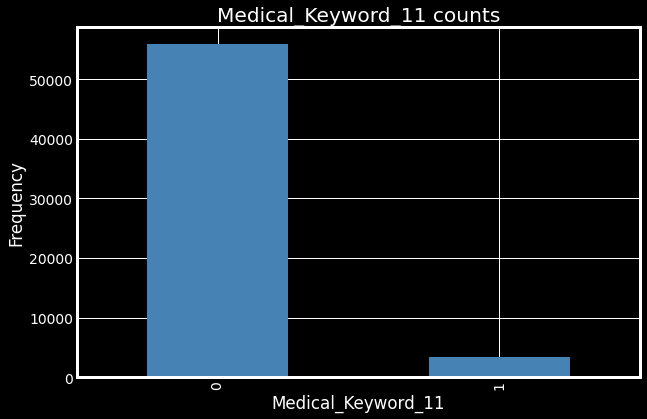

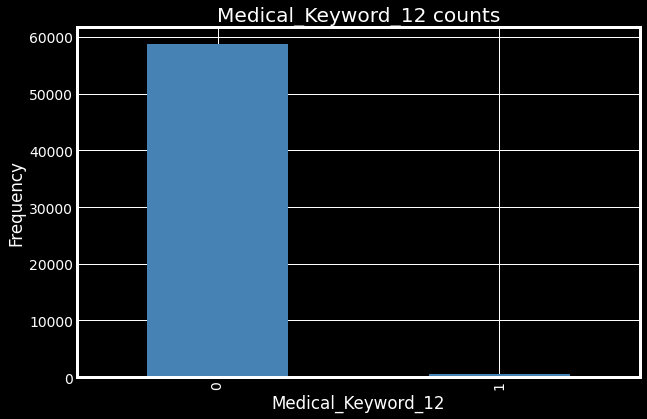

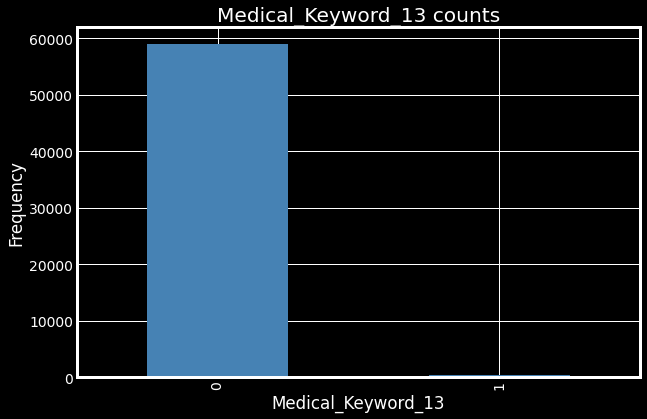

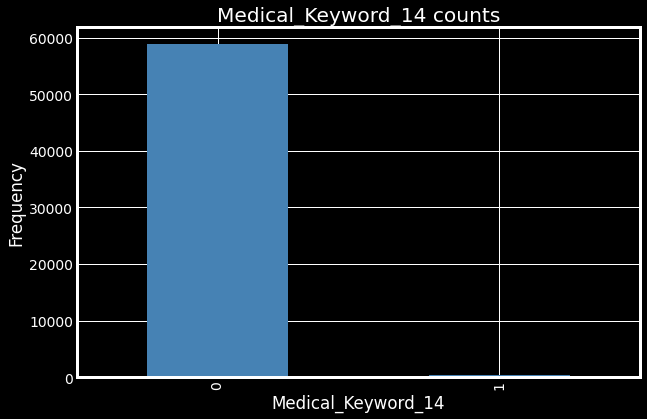

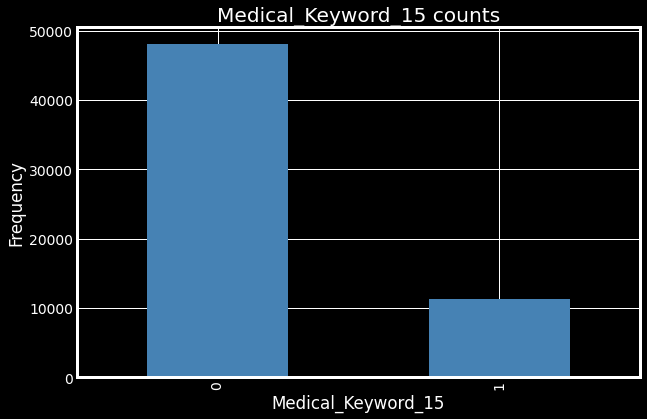

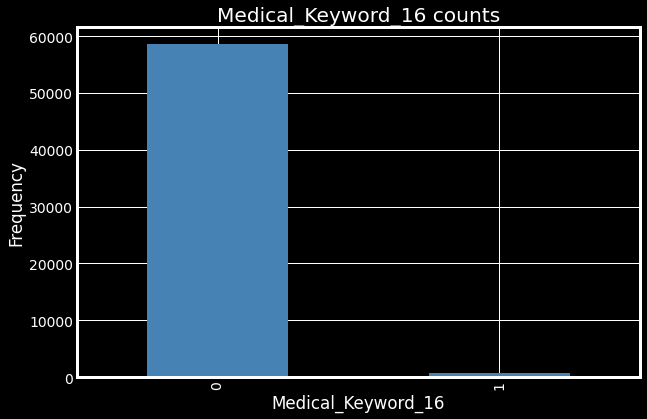

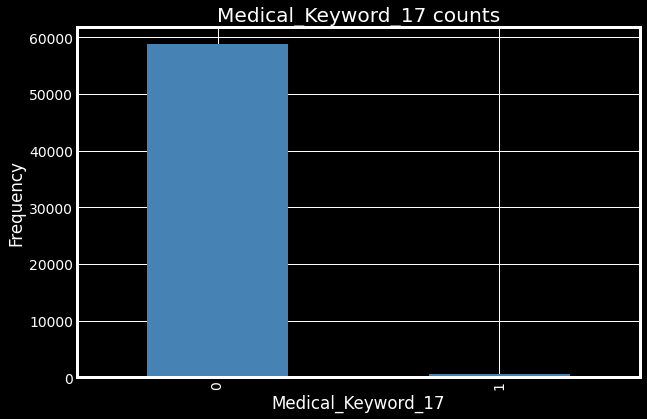

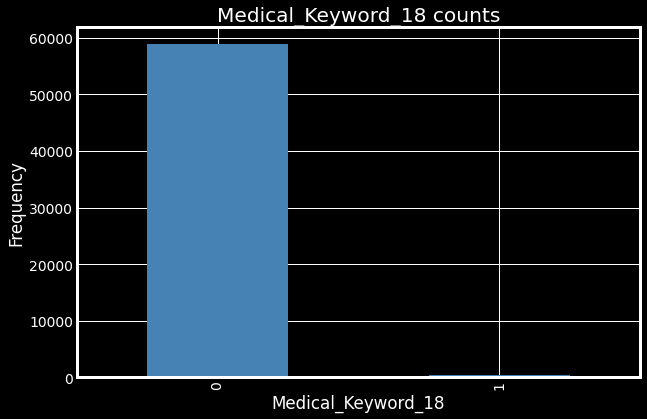

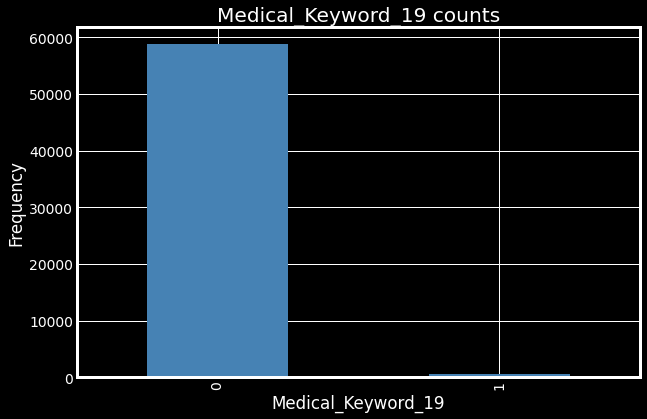

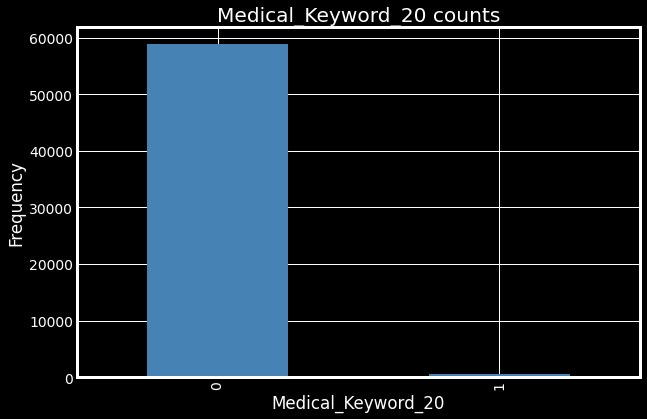

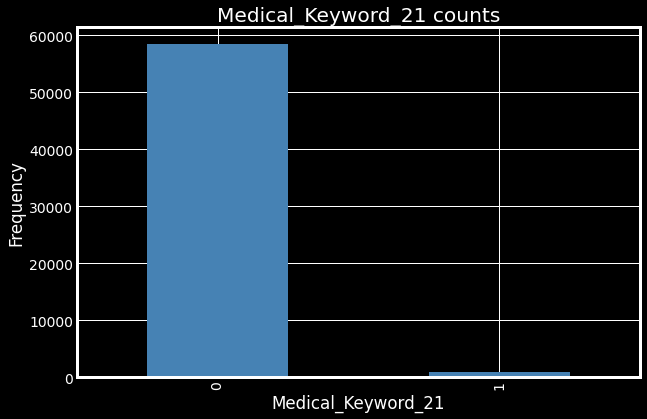

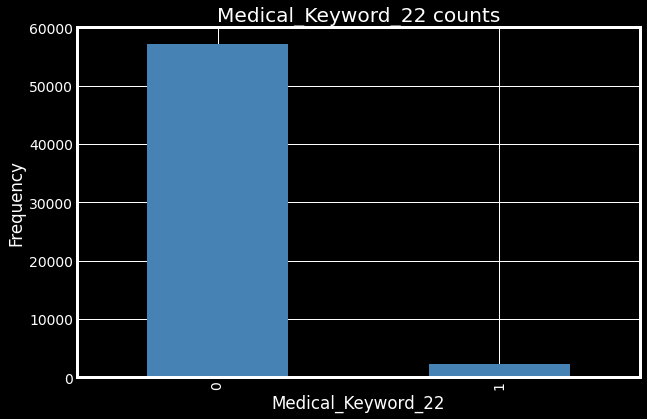

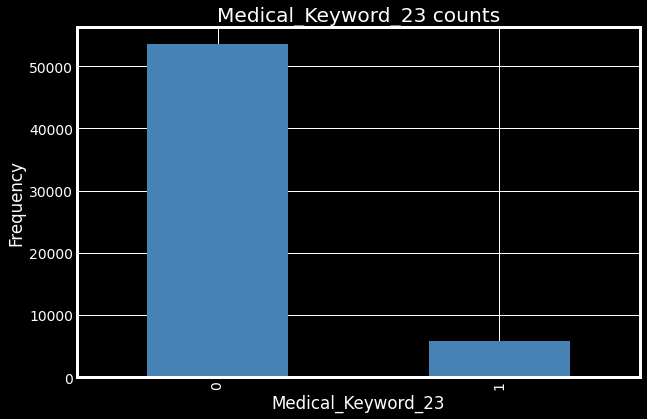

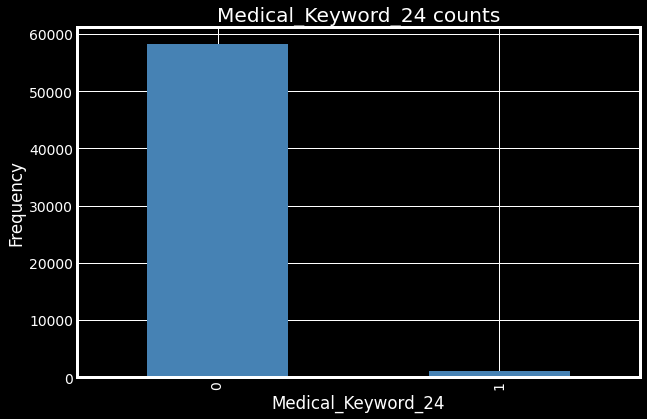

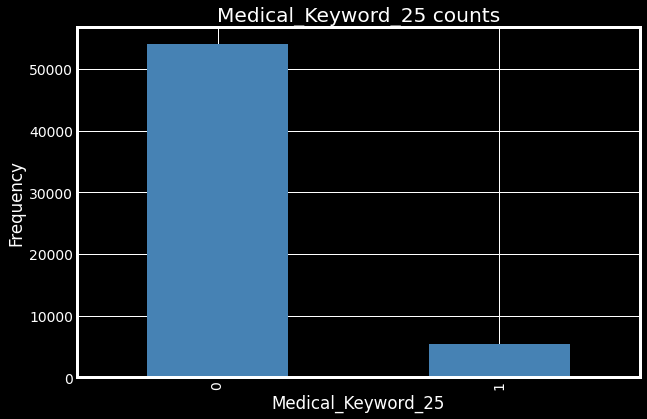

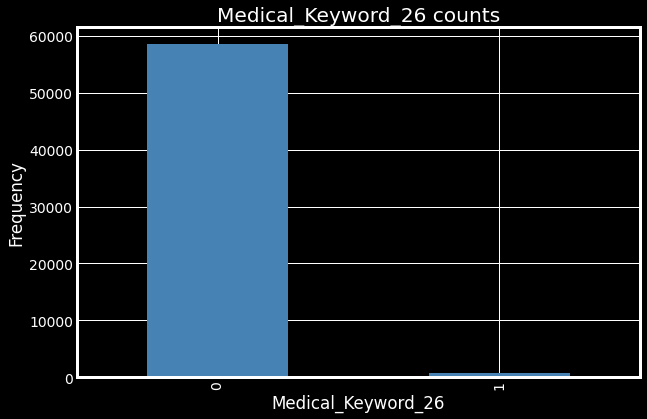

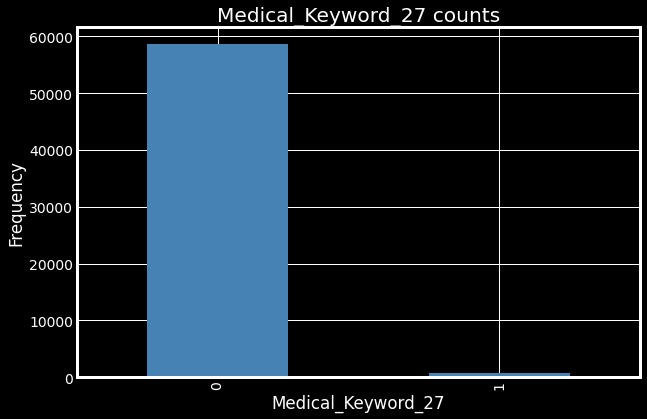

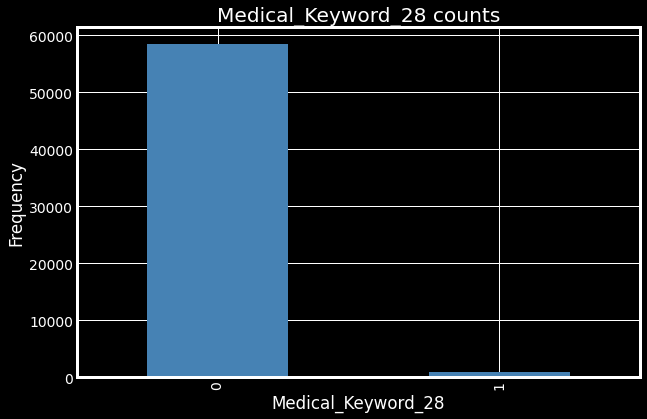

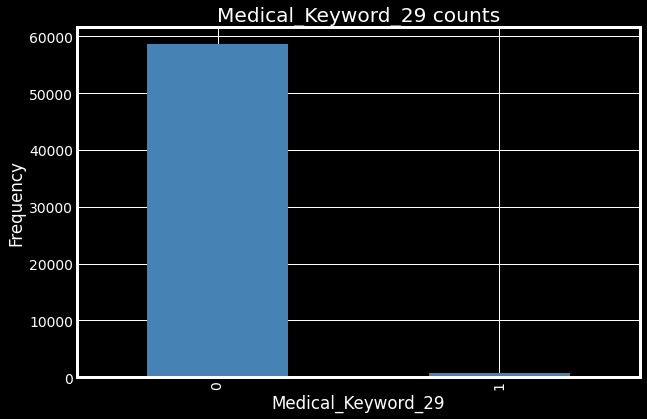

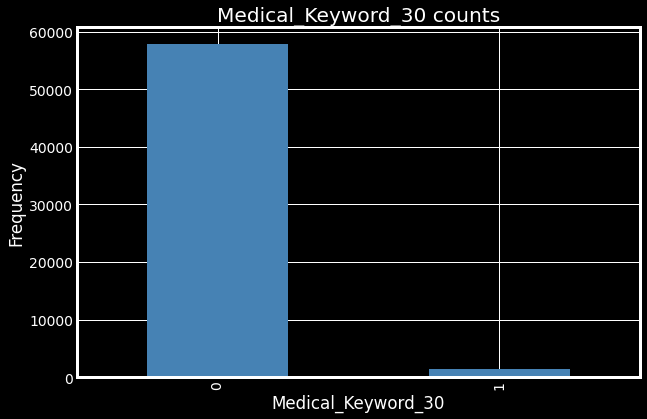

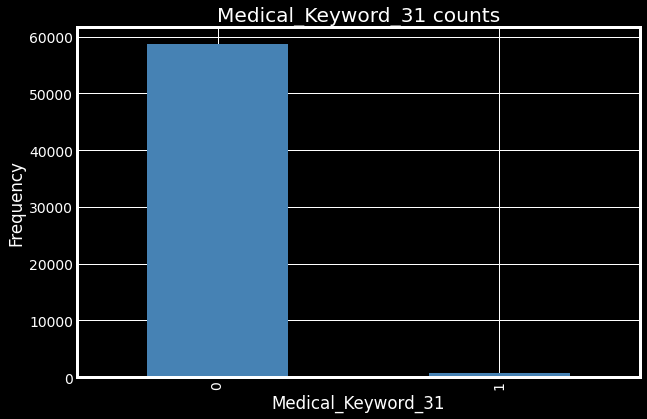

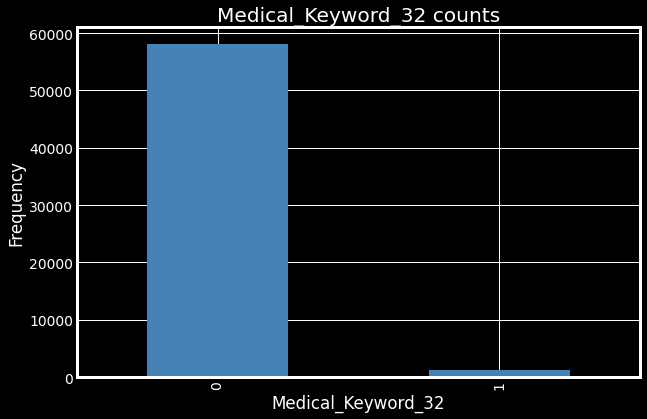

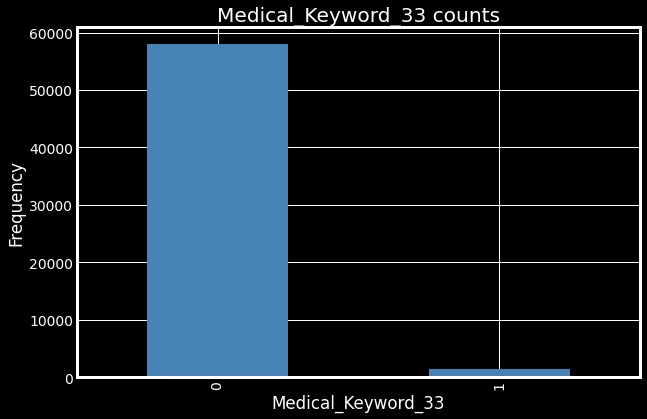

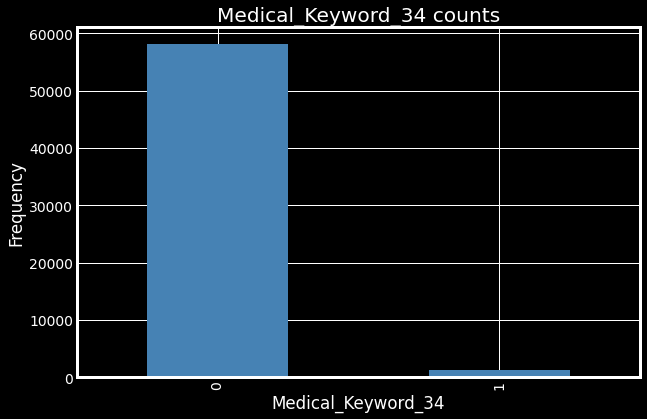

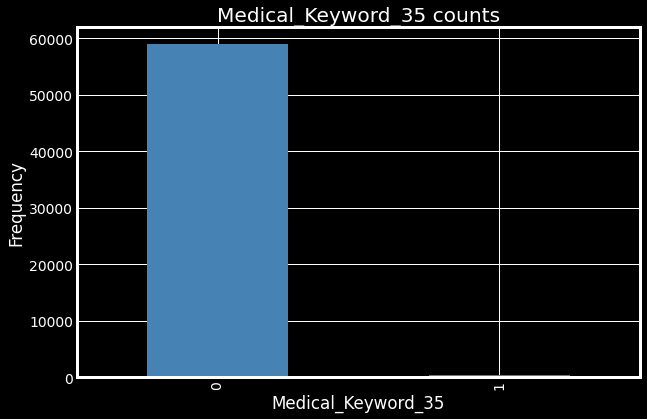

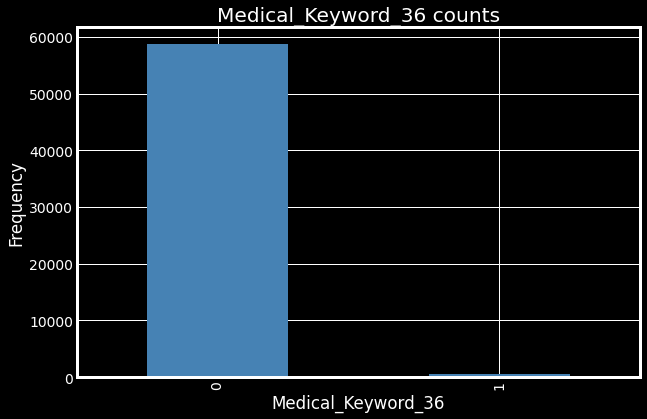

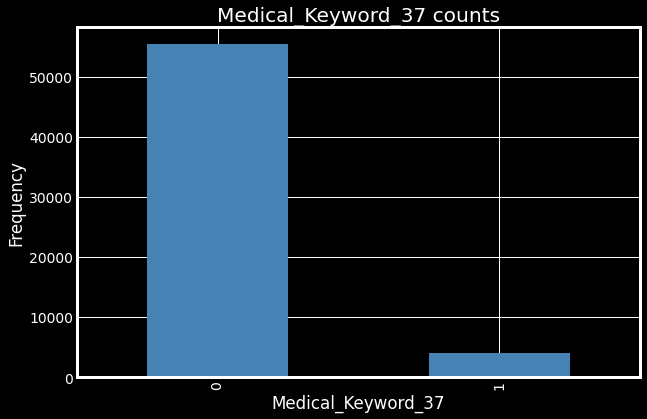

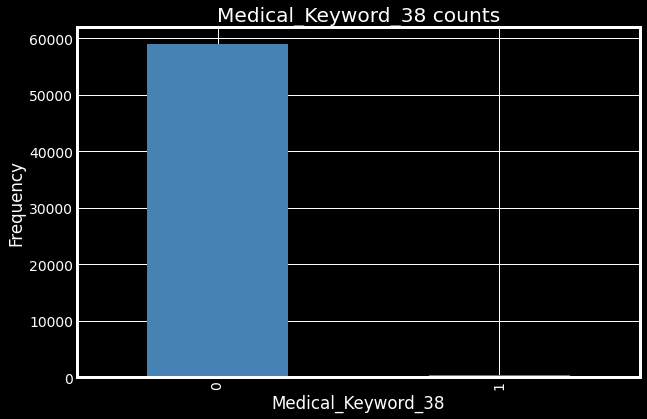

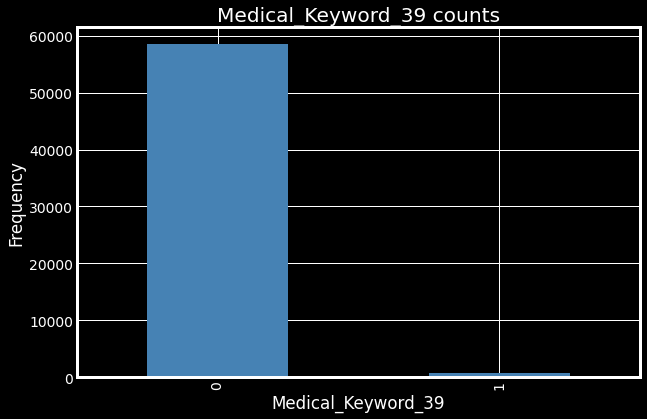

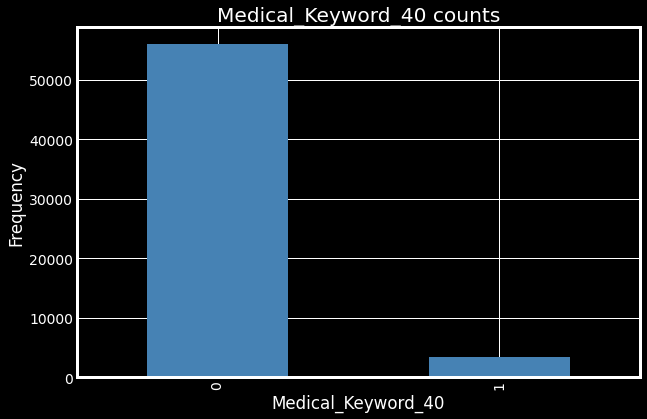

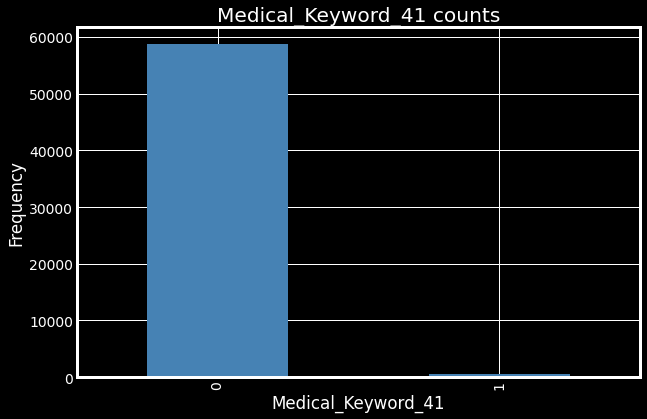

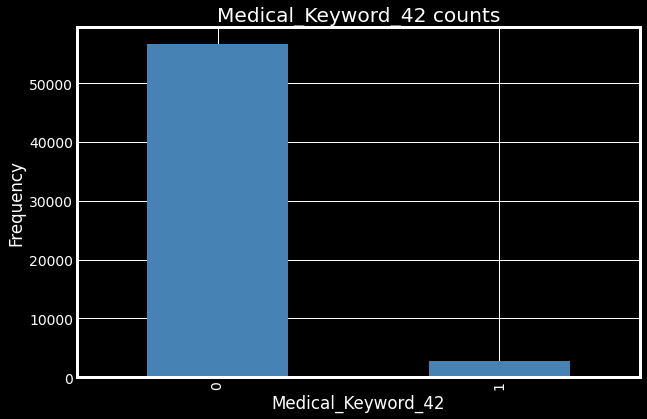

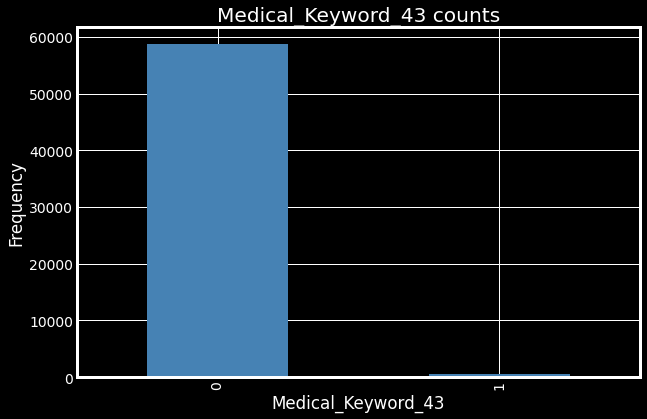

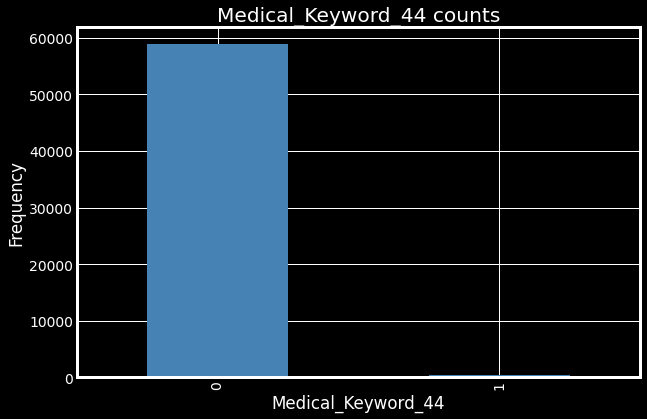

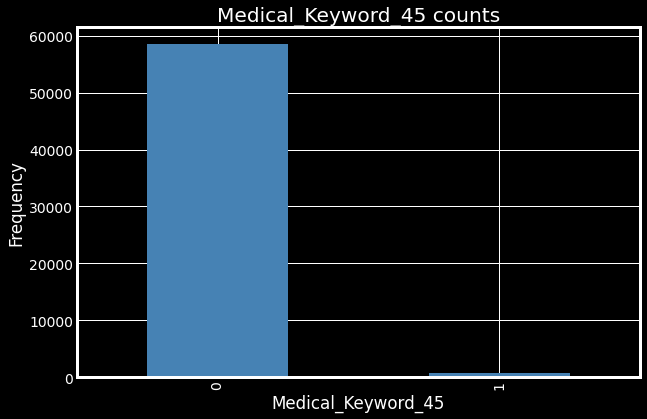

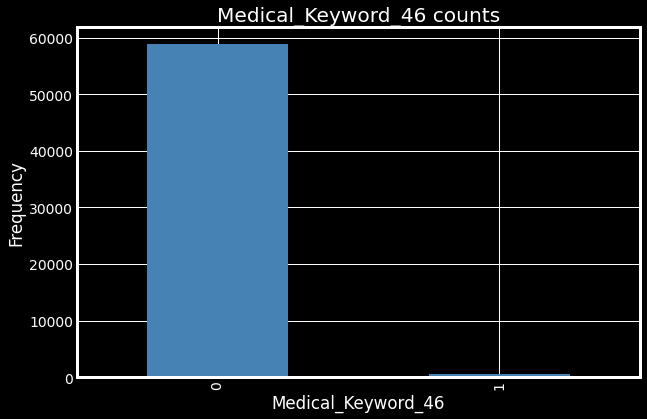

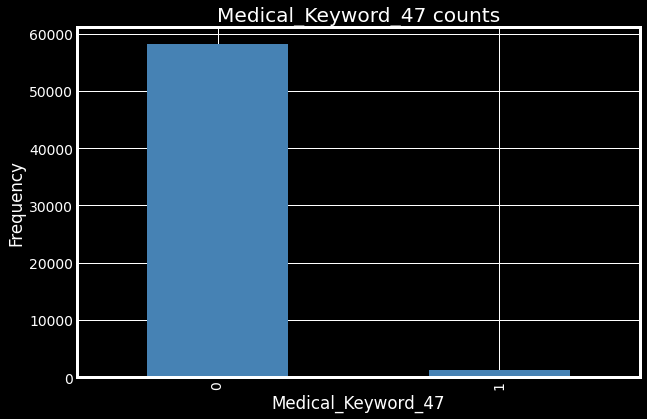

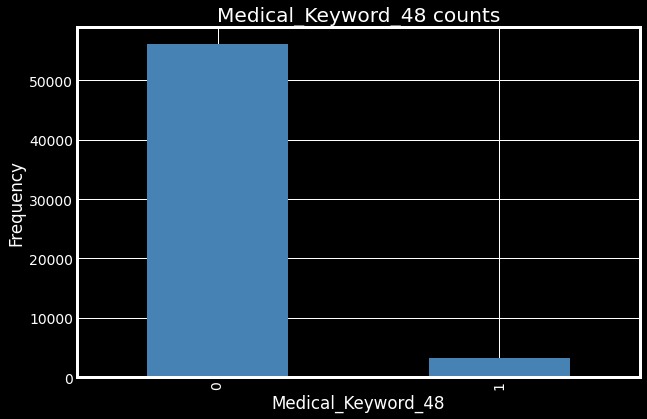

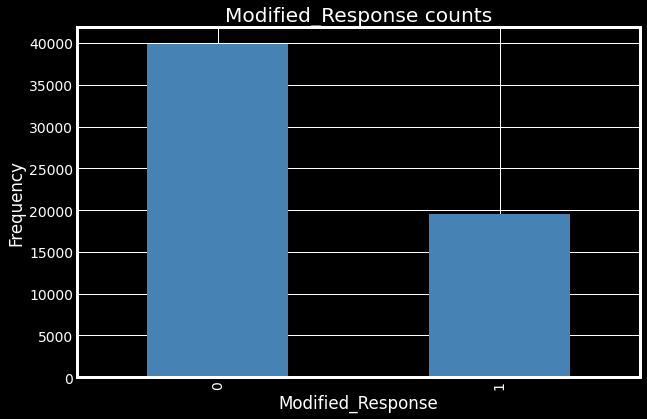

In [10]:
# Doing count plots for categorical
for col in categorical:
    counts = insurance_df[col].value_counts().sort_index()
    if len(counts) > 10 and len(counts) < 50 :
        fig = plt.figure(figsize=(30, 10))
    elif len(counts) >50 :
        continue
    else:
        fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

> **D3 has the highest frequencies**

> Most of the features here are unbalanced.

<AxesSubplot:xlabel='Employment_Info_1'>

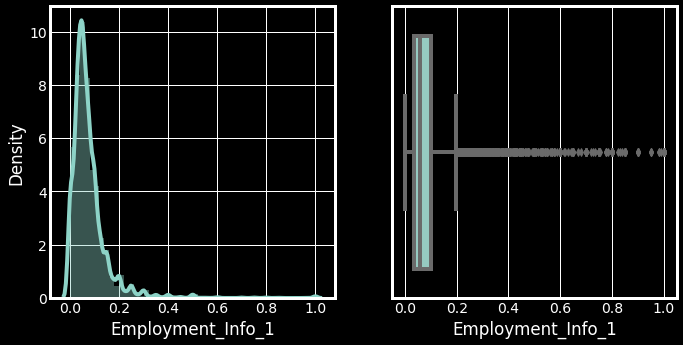

In [11]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Employment_Info_1'], ax=axes[0])
sns.boxplot(insurance_df['Employment_Info_1'], ax=axes[1])

> Right skewed.

> Outliers can be seen.

<AxesSubplot:xlabel='Employment_Info_4'>

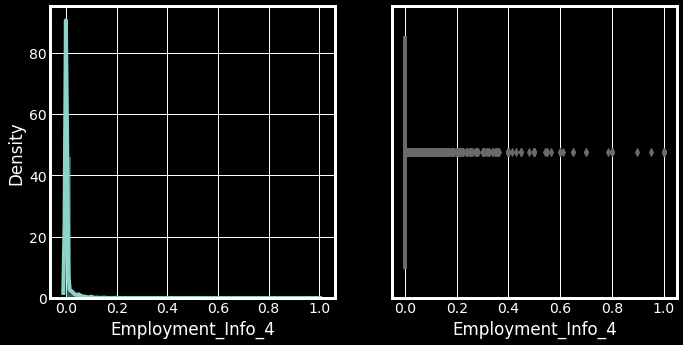

In [12]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Employment_Info_4'], ax=axes[0])
sns.boxplot(insurance_df['Employment_Info_4'], ax=axes[1])

<AxesSubplot:xlabel='Employment_Info_6'>

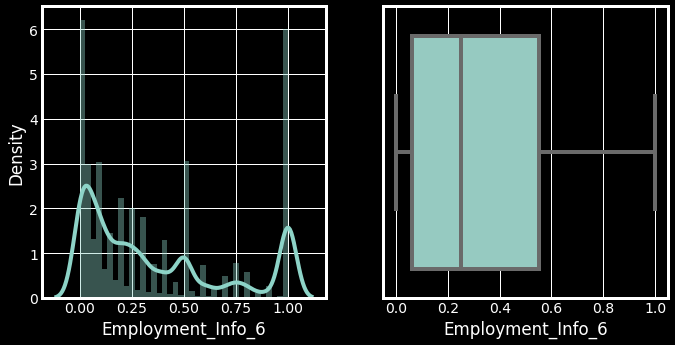

In [13]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Employment_Info_6'], ax=axes[0])
sns.boxplot(insurance_df['Employment_Info_6'], ax=axes[1])

<AxesSubplot:xlabel='Family_Hist_4'>

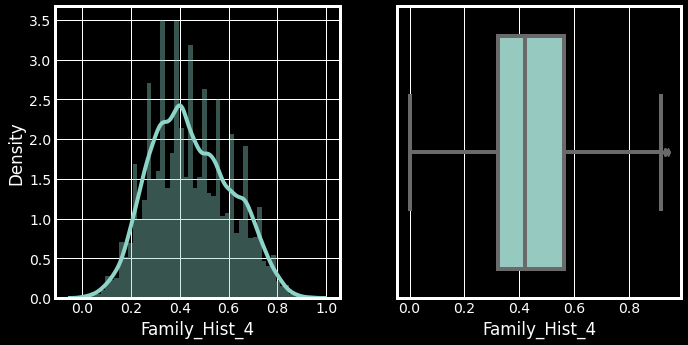

In [14]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Family_Hist_4'], ax=axes[0])
sns.boxplot(insurance_df['Family_Hist_4'], ax=axes[1])

## **Checking Correlation For Features greater than 0.8**

In [15]:
corr = insurance_df.corr()
corr_greater_than_80 = corr[corr>=.8]
corr_greater_than_80

Product_Info_1  Product_Info_3  Product_Info_4  \
Product_Info_1                 1.0             NaN             NaN   
Product_Info_3                 NaN             1.0             NaN   
Product_Info_4                 NaN             NaN             1.0   
Product_Info_5                 NaN             NaN             NaN   
Product_Info_6                 NaN             NaN             NaN   
...                            ...             ...             ...   
Medical_Keyword_45             NaN             NaN             NaN   
Medical_Keyword_46             NaN             NaN             NaN   
Medical_Keyword_47             NaN             NaN             NaN   
Medical_Keyword_48             NaN             NaN             NaN   
Modified_Response              NaN             NaN             NaN   

                    Product_Info_5  Product_Info_6  Product_Info_7  Ins_Age  \
Product_Info_1                 NaN             NaN             NaN      NaN   
Product_Info_3                 NaN             NaN             NaN      NaN   
Product_Info_4                 NaN             NaN             NaN      NaN   
Product_Info_5                 1.0             NaN             NaN      NaN   
Product_Info_6                 NaN             1.0             NaN      NaN   
...                            ...             ...             ...      ...   
Medical_Keyword_45             NaN             NaN             NaN      NaN   
Medical_Keyword_46             NaN             NaN             NaN      NaN   
Medical_Keyword_47             NaN             NaN             NaN      NaN   
Medical_Keyword_48             NaN             NaN             NaN      NaN   
Modified_Response              NaN             NaN             NaN      NaN   

                    Ht  Wt  BMI  ...  Medical_Keyword_40  Medical_Keyword_41  \
Product_Info_1     NaN NaN  NaN  ...                 NaN                 NaN   
Product_Info_3     NaN NaN  NaN  ...                 NaN                 NaN   
Product_Info_4     NaN NaN  NaN  ...                 NaN                 NaN   
Product_Info_5     NaN NaN  NaN  ...                 NaN                 NaN   
Product_Info_6     NaN NaN  NaN  ...                 NaN                 NaN   
...                 ..  ..  ...  ...                 ...                 ...   
Medical_Keyword_45 NaN NaN  NaN  ...                 NaN                 NaN   
Medical_Keyword_46 NaN NaN  NaN  ...                 NaN                 NaN   
Medical_Keyword_47 NaN NaN  NaN  ...                 NaN                 NaN   
Medical_Keyword_48 NaN NaN  NaN  ...                 NaN                 NaN   
Modified_Response  NaN NaN  NaN  ...                 NaN                 NaN   

                    Medical_Keyword_42  Medical_Keyword_43  \
Product_Info_1                     NaN                 NaN   
Product_Info_3                     NaN                 NaN   
Product_Info_4                     NaN                 NaN   
Product_Info_5                     NaN                 NaN   
Product_Info_6                     NaN                 NaN   
...                                ...                 ...   
Medical_Keyword_45                 NaN                 NaN   
Medical_Keyword_46                 NaN                 NaN   
Medical_Keyword_47                 NaN                 NaN   
Medical_Keyword_48                 NaN                 NaN   
Modified_Response                  NaN                 NaN   

                    Medical_Keyword_44  Medical_Keyword_45  \
Product_Info_1                     NaN                 NaN   
Product_Info_3                     NaN                 NaN   
Product_Info_4                     NaN                 NaN   
Product_Info_5                     NaN                 NaN   
Product_Info_6                     NaN                 NaN   
...                                ...                 ...   
Medical_Keyword_45                 NaN                 1.0   
Medical_Keyword_46          

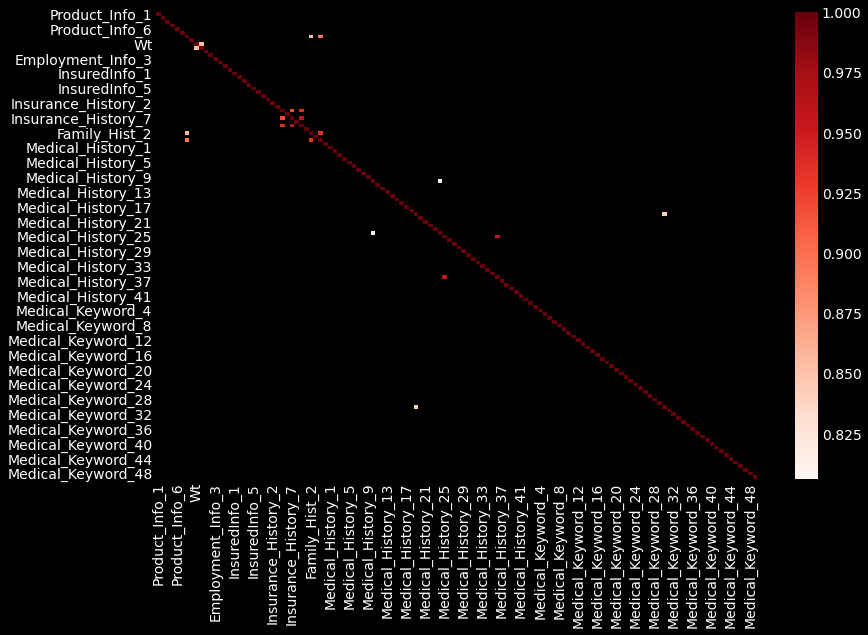

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_80, cmap="Reds");

### **CONCLUSION**

> BMI and Weight are highly correlated, which makes sense also as these 2 features are directly proprtional.

> Ins_Age and Family_Hist_4, Family_Hist_2 highly correlated

> Although, I am not going to perform any transformation on any feature or drop any as these are tree based models and they don't get affected by correlation much because of their non parametric nature.

In [17]:
#setting max columns to 200
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

## Null Value Check

In [18]:
#checking percentage of missing values in a column
missing_val_count_by_column = insurance_df.isnull().sum()/len(insurance_df)

print(missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False))

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


## Removing Unimportant Column

In [19]:
# Dropping all columns in which greater than 40 percent null values
insurance_df = insurance_df.dropna(thresh=insurance_df.shape[0]*0.4,how='all',axis=1)

In [20]:
# Does not contain important information
insurance_df.drop('Product_Info_2',axis=1,inplace=True)

## **X and Y split**

In [21]:
# Data for all the independent variables
X = insurance_df.drop(labels='Modified_Response',axis=1)

# Data for the dependent variable
Y = insurance_df['Modified_Response']

## **Filling Remaining Missing Values**

In [22]:
# Filling remaining missing values with mean
X = X.fillna(X.mean())

## **Train Test Split**

In [23]:
# Train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

## **Shapes of Train and Test Data**

In [24]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(44535, 120) (44535,)
(14846, 120) (14846,)


## Utility Functions

In [25]:
# Utility Functions
def check_scores(model, X_train, X_test ):
  # Making predictions on train and test data

    train_class_preds = model.predict(X_train)
    test_class_preds = model.predict(X_test)


    # Get the probabilities on train and test
    train_preds = model.predict_proba(X_train)[:,1]
    test_preds = model.predict_proba(X_test)[:,1]


    # Calculating accuracy on train and test
    train_accuracy = accuracy_score(Y_train,train_class_preds)
    test_accuracy = accuracy_score(Y_test,test_class_preds)

    print("The accuracy on train dataset is", train_accuracy)
    print("The accuracy on test dataset is", test_accuracy)
    print()
    # Get the confusion matrices for train and test
    train_cm = confusion_matrix(Y_train,train_class_preds)
    test_cm = confusion_matrix(Y_test,test_class_preds )

    print('Train confusion matrix:')
    print( train_cm)
    print()
    print('Test confusion matrix:')
    print(test_cm)
    print()

    # Get the roc_auc score for train and test dataset
    train_auc = roc_auc_score(Y_train,train_preds)
    test_auc = roc_auc_score(Y_test,test_preds)

    print('ROC on train data:', train_auc)
    print('ROC on test data:', test_auc)
  
    # Fscore, precision and recall on test data
    f1 = f1_score(Y_test, test_class_preds)
    precision = precision_score(Y_test, test_class_preds)
    recall = recall_score(Y_test, test_class_preds) 
  
  
    #R2 score on train and test data
    train_log = log_loss(Y_train,train_preds)
    test_log = log_loss(Y_test, test_preds)

    print()
    print('Train log loss:', train_log)
    print('Test log loss:', test_log)
    print()
    print("F score is:",f1 )
    print("Precision is:",precision)
    print("Recall is:", recall)
    return model, train_auc, test_auc, train_accuracy, test_accuracy,f1, precision,recall, train_log, test_log


def check_importance(model, X_train):
    #Checking importance of features
    importances = model.feature_importances_
  
    #List of columns and their importances
    importance_dict = {'Feature' : list(X_train.columns),
                    'Feature Importance' : importances}
    #Creating a dataframe
    importance_df = pd.DataFrame(importance_dict)
  
    #Rounding it off to 2 digits as we might get exponential numbers
    importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
    return importance_df.sort_values(by=['Feature Importance'],ascending=False)

def grid_search(model, parameters, X_train, Y_train):
    #Doing a grid
    grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
    #Fitting the grid 
    grid.fit(X_train,Y_train)
    print()
    print()
    # Best model found using grid search
    optimal_model = grid.best_estimator_
    print('Best parameters are: ')
    pprint( grid.best_params_)

    return optimal_model

# This function will show how a feature is pushing towards 0 or 1
def interpret_with_lime(model, X_test):
    # New data
    interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification')
  

    exp = interpretor.explain_instance(
        data_row=X_test.iloc[10], 
        predict_fn=model.predict_proba
    )

    exp.show_in_notebook(show_table=True)

# This gives feature importance
def plot_feature_importance(model, X_train):
    # PLotting features vs their importance factors
    fig = plt.figure(figsize = (15, 8))
  
    # Extracting importance values
    values =check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature Importance'].values
  
  
    # Extracting importance features
    features = check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature'].values

    plt.bar(features, values, color ='blue',
          width = 0.4)
    plt.xticks( rotation='vertical')
    plt.show()

## ADS 1 - Random Forest

In [26]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
rf_parameters = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

pprint(rf_parameters)

#finding the best model
rf_optimal_model = grid_search(RandomForestClassifier(), rf_parameters, X_train, Y_train)

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}
Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.5s


In [27]:
# Getting scores from all the metrices
rf_model, rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_f1, rf_precision,rf_recall,rf_train_log, rf_test_log = check_scores(rf_optimal_model, X_train, X_test )

The accuracy on train dataset is 0.8104861345009543
The accuracy on test dataset is 0.8047959046207732

Train confusion matrix:
[[27107  2800]
 [ 5640  8988]]

Test confusion matrix:
[[9042  943]
 [1955 2906]]

ROC on train data: 0.8917117576838944
ROC on test data: 0.8851959383222128

Train log loss: 0.42585786837258777
Test log loss: 0.43040927964018605

F score is: 0.6672789896670495
Precision is: 0.7550012990387114
Recall is: 0.5978193787286566


## **Feature Importance For Random Forest**

In [28]:
# Getting the feature importance for all the features
check_importance(rf_model, X_train)

Feature  Feature Importance
9                    BMI                0.25
8                     Wt                0.16
55    Medical_History_23                0.12
86    Medical_Keyword_15                0.10
38     Medical_History_4                0.10
21         InsuredInfo_6                0.04
2         Product_Info_4                0.03
6                Ins_Age                0.03
34         Family_Hist_4                0.02
74     Medical_Keyword_3                0.02
7                     Ht                0.02
35     Medical_History_1                0.01
119   Medical_Keyword_48                0.01
48    Medical_History_16                0.01
63    Medical_History_33                0.01
69    Medical_History_39                0.01
32         Family_Hist_2                0.01
94    Medical_Keyword_23                0.01
107   Medical_Keyword_36                0.00
106   Medical_Keyword_35                0.00
113   Medical_Keyword_42                0.00
85    Medical_Keyword_14                0.00
84    Medical_Keyword_13                0.00
83    Medical_Keyword_12                0.00
114   Medical_Keyword_43                0.00
82    Medical_Keyword_11                0.00
81    Medical_Keyword_10                0.00
80     Medical_Keyword_9                0.00
79     Medical_Keyword_8                0.00
78     Medical_Keyword_7                0.00
77     Medical_Keyword_6                0.00
115   Medical_Keyword_44                0.00
76     Medical_Keyword_5                0.00
75     Medical_Keyword_4                0.00
116   Medical_Keyword_45                0.00
73     Medical_Keyword_2                0.00
72     Medical_Keyword_1                0.00
71    Medical_History_41                0.00
70    Medical_History_40                0.00
117   Medical_Keyword_46                0.00
118   Medical_Keyword_47                0.00
87    Medical_Keyword_16                0.00
88    Medical_Keyword_17                0.00
89    Medical_Keyword_18                0.00
97    Medical_Keyword_26                0.00
105   Medical_Keyword_34                0.00
108   Medical_Keyword_37                0.00
104   Medical_Keyword_33                0.00
103   Medical_Keyword_32                0.00
102   Medical_Keyword_31                0.00
101   Medical_Keyword_30                0.00
100   Medical_Keyword_29                0.00
99    Medical_Keyword_28                0.00
98    Medical_Keyword_27                0.00
96    Medical_Keyword_25                0.00
90    Medical_Keyword_19                0.00
95    Medical_Keyword_24                0.00
109   Medical_Keyword_38                0.00
67    Medical_History_37                0.00
110   Medical_Keyword_39                0.00
111   Medical_Keyword_40                0.00
93    Medical_Keyword_22                0.00
92    Medical_Keyword_21                0.00
112   Medical_Keyword_41                0.00
91    Medical_Keyword_20                0.00
68    Medical_History_38                0.00
0         Product_Info_1                0.00
66    Medical_History_36                0.00
33         Family_Hist_3                0.00
30   Insurance_History_9                0.00
29   Insurance_History_8                0.00
28   Insurance_History_7                0.00
27   Insurance_History_5                0.00
26   Insurance_History_4                0.00
25   Insurance_History_3                0.00
24   Insurance_History_2                0.00
23   Insurance_History_1                0.00
22         InsuredInfo_7                0.00
20         InsuredInfo_5                0.00
19         InsuredInfo_4                0.00
18         InsuredInfo_3                0.00
17         InsuredInfo_2                0.00
16         InsuredInfo_1                0.00
15     Employment_Info_6                0.00
14     Employment_Info_5                0.00
13     Employment_Info_4                0.00
12     Employment_Info_3                0.00
11     Employment_Info_2                0.00
10     Emplo

## **Plotting only those features which are contributing something**

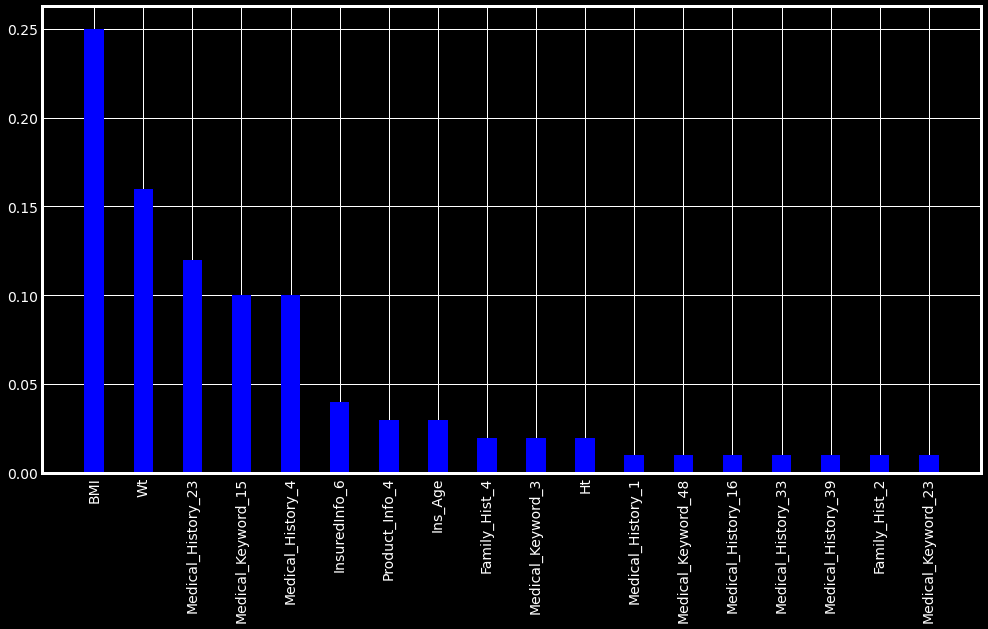

In [29]:
# PLotting only those features which are contributing something
plot_feature_importance(rf_model, X_train)

### **CONCLUSION:**

> BMI, weight, Medical_History_23, Medical_History_4 and Medical_Keyword_15 seems to be important features according to random forest.

> Also, only these features are contributing to the model prediction. Some features can be elmininated which are not contributing on further investigation.

## ADS 2 - Gradient Boosting

In [30]:
#finding the best model
gb_parameters ={
    "n_estimators":[5,50,250],
    "max_depth":[1,3,5,7],
    "learning_rate":[0.01,0.1,1]
}

pprint(gb_parameters)

gb_optimal_model = grid_search(GradientBoostingClassifier(), gb_parameters, X_train, Y_train)

{'learning_rate': [0.01, 0.1, 1],
 'max_depth': [1, 3, 5, 7],
 'n_estimators': [5, 50, 250]}
Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.2s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   1.1s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=250; total time=   5.0s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=250; total time=   5.1s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.4s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.4s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   3.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   3.0s
[CV] END ..learning_rate=0.01, max_d

## Feature Importance For Gradient Boosting

In [31]:
# Getting the scpres for all the score metrics used here
gb_model, gb_train_auc, gb_test_auc, gb_train_accuracy, gb_test_accuracy,gb_f1, gb_precision,gb_recall,gb_train_log, gb_test_log = check_scores(gb_optimal_model, X_train, X_test )

The accuracy on train dataset is 0.8649152352082632
The accuracy on test dataset is 0.8354438906102654

Train confusion matrix:
[[26657  3250]
 [ 2766 11862]]

Test confusion matrix:
[[8739 1246]
 [1197 3664]]

ROC on train data: 0.9380525566271211
ROC on test data: 0.9095173515261579

Train log loss: 0.30289100758233584
Test log loss: 0.35339221764427176

F score is: 0.749974414082489
Precision is: 0.7462321792260692
Recall is: 0.7537543715284921


In [32]:
# Getting feature importance
check_importance(gb_model, X_train)

Feature  Feature Importance
9                    BMI                0.39
55    Medical_History_23                0.14
38     Medical_History_4                0.13
2         Product_Info_4                0.05
6                Ins_Age                0.03
8                     Wt                0.03
86    Medical_Keyword_15                0.03
74     Medical_Keyword_3                0.02
34         Family_Hist_4                0.01
15     Employment_Info_6                0.01
21         InsuredInfo_6                0.01
31         Family_Hist_1                0.01
32         Family_Hist_2                0.01
33         Family_Hist_3                0.01
61    Medical_History_30                0.01
35     Medical_History_1                0.01
36     Medical_History_2                0.01
10     Employment_Info_1                0.01
27   Insurance_History_5                0.01
90    Medical_Keyword_19                0.00
91    Medical_Keyword_20                0.00
89    Medical_Keyword_18                0.00
92    Medical_Keyword_21                0.00
88    Medical_Keyword_17                0.00
87    Medical_Keyword_16                0.00
81    Medical_Keyword_10                0.00
85    Medical_Keyword_14                0.00
84    Medical_Keyword_13                0.00
83    Medical_Keyword_12                0.00
82    Medical_Keyword_11                0.00
94    Medical_Keyword_23                0.00
80     Medical_Keyword_9                0.00
79     Medical_Keyword_8                0.00
78     Medical_Keyword_7                0.00
77     Medical_Keyword_6                0.00
76     Medical_Keyword_5                0.00
75     Medical_Keyword_4                0.00
73     Medical_Keyword_2                0.00
72     Medical_Keyword_1                0.00
71    Medical_History_41                0.00
93    Medical_Keyword_22                0.00
0         Product_Info_1                0.00
95    Medical_Keyword_24                0.00
96    Medical_Keyword_25                0.00
118   Medical_Keyword_47                0.00
117   Medical_Keyword_46                0.00
116   Medical_Keyword_45                0.00
115   Medical_Keyword_44                0.00
114   Medical_Keyword_43                0.00
113   Medical_Keyword_42                0.00
112   Medical_Keyword_41                0.00
111   Medical_Keyword_40                0.00
110   Medical_Keyword_39                0.00
109   Medical_Keyword_38                0.00
108   Medical_Keyword_37                0.00
107   Medical_Keyword_36                0.00
106   Medical_Keyword_35                0.00
105   Medical_Keyword_34                0.00
104   Medical_Keyword_33                0.00
103   Medical_Keyword_32                0.00
102   Medical_Keyword_31                0.00
101   Medical_Keyword_30                0.00
100   Medical_Keyword_29                0.00
99    Medical_Keyword_28                0.00
98    Medical_Keyword_27                0.00
69    Medical_History_39                0.00
97    Medical_Keyword_26                0.00
70    Medical_History_40                0.00
60    Medical_History_29                0.00
68    Medical_History_38                0.00
19         InsuredInfo_4                0.00
37     Medical_History_3                0.00
30   Insurance_History_9                0.00
29   Insurance_History_8                0.00
28   Insurance_History_7                0.00
26   Insurance_History_4                0.00
25   Insurance_History_3                0.00
24   Insurance_History_2                0.00
23   Insurance_History_1                0.00
22         InsuredInfo_7                0.00
20         InsuredInfo_5                0.00
18         InsuredInfo_3                0.00
40     Medical_History_6                0.00
17         InsuredInfo_2                0.00
16         InsuredInfo_1                0.00
14     Employment_Info_5                0.00
13     Employment_Info_4                0.00
12     Employment_Info_3                0.00
11     Emplo

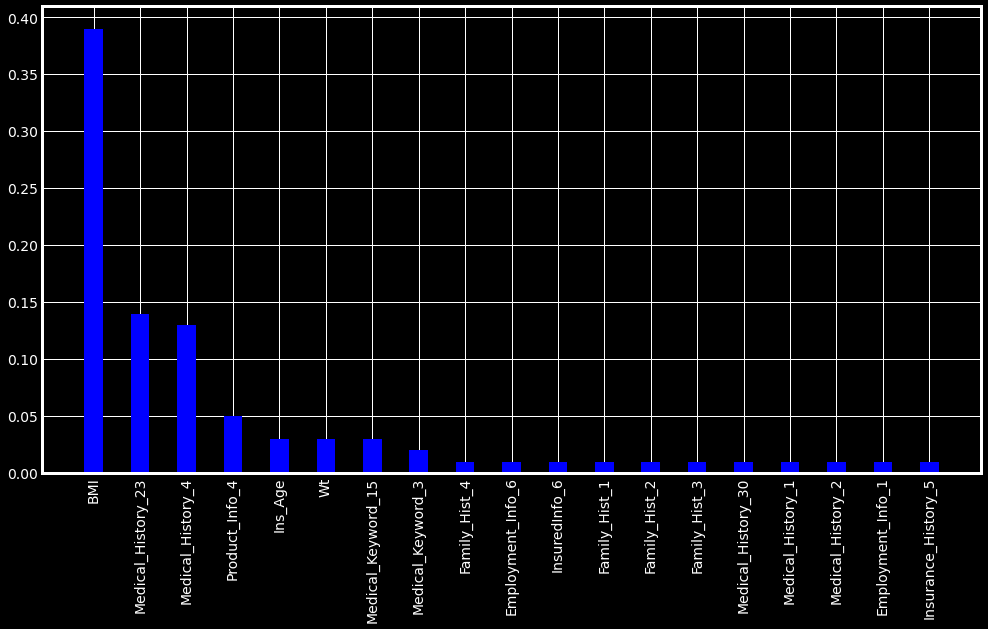

In [33]:
# Plotting only those features which are contributing something
plot_feature_importance(gb_model, X_train)

#### **CONCLUSION:**

> BMI, weight, Medical_History_23, Medical_History_4 and Medical_Keyword_15 seems to be the most important 5 features according to Gradient boosting.


## ADS 3 - XGBOOST

In [34]:
# Parameter grid for xgboost
xgb_parameters = {'max_depth': [1,3,5], 'n_estimators': [2,5,10], 'learning_rate': [.01 , .1, .5]}
print('XGB parameters areL:')
pprint(xgb_parameters)
#finding the best model
xgb_optimal_model = grid_search(XGBClassifier(), xgb_parameters, X_train, Y_train)

XGB parameters areL:
{'learning_rate': [0.01, 0.1, 0.5],
 'max_depth': [1, 3, 5],
 'n_estimators': [2, 5, 10]}
Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=2; total time=   0.2s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=2; total time=   0.1s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.2s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=10; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=10; total time=   0.2s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=2; total time=   0.1s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=2; total time=   0.1s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.2s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.2s
[CV] END ...learni

In [35]:
# Getting the scores for all the score metrics used here
xgb_model, xgb_train_auc, xgb_test_auc, xgb_train_accuracy, xgb_test_accuracy,xgb_f1, xgb_precision,xgb_recall,xgb_train_log, xgb_test_log= check_scores(xgb_optimal_model, X_train, X_test )

The accuracy on train dataset is 0.830672504771528
The accuracy on test dataset is 0.825272800754412

Train confusion matrix:
[[25730  4177]
 [ 3364 11264]]

Test confusion matrix:
[[8566 1419]
 [1175 3686]]

ROC on train data: 0.9070705299819286
ROC on test data: 0.9015875283816488

Train log loss: 0.3602193482303539
Test log loss: 0.36868035788242165

F score is: 0.7397150311057596
Precision is: 0.7220372184133202
Recall is: 0.7582801892614688


## Feature Importance For XGBoost

In [36]:
# Getting feature importance

check_importance(xgb_model, X_train)

Feature  Feature Importance
55    Medical_History_23                0.19
9                    BMI                0.15
38     Medical_History_4                0.13
74     Medical_Keyword_3                0.06
86    Medical_Keyword_15                0.05
61    Medical_History_30                0.05
46    Medical_History_13                0.04
22         InsuredInfo_7                0.04
21         InsuredInfo_6                0.03
112   Medical_Keyword_41                0.03
2         Product_Info_4                0.03
39     Medical_History_5                0.02
94    Medical_Keyword_23                0.02
31         Family_Hist_1                0.02
52    Medical_History_20                0.01
59    Medical_History_28                0.01
37     Medical_History_3                0.01
69    Medical_History_39                0.01
33         Family_Hist_3                0.01
24   Insurance_History_2                0.01
0         Product_Info_1                0.01
70    Medical_History_40                0.01
20         InsuredInfo_5                0.01
6                Ins_Age                0.01
106   Medical_Keyword_35                0.01
17         InsuredInfo_2                0.01
78     Medical_Keyword_7                0.00
85    Medical_Keyword_14                0.00
84    Medical_Keyword_13                0.00
83    Medical_Keyword_12                0.00
115   Medical_Keyword_44                0.00
82    Medical_Keyword_11                0.00
81    Medical_Keyword_10                0.00
80     Medical_Keyword_9                0.00
79     Medical_Keyword_8                0.00
116   Medical_Keyword_45                0.00
87    Medical_Keyword_16                0.00
77     Medical_Keyword_6                0.00
117   Medical_Keyword_46                0.00
76     Medical_Keyword_5                0.00
75     Medical_Keyword_4                0.00
118   Medical_Keyword_47                0.00
73     Medical_Keyword_2                0.00
72     Medical_Keyword_1                0.00
71    Medical_History_41                0.00
114   Medical_Keyword_43                0.00
88    Medical_Keyword_17                0.00
113   Medical_Keyword_42                0.00
104   Medical_Keyword_33                0.00
105   Medical_Keyword_34                0.00
103   Medical_Keyword_32                0.00
102   Medical_Keyword_31                0.00
101   Medical_Keyword_30                0.00
100   Medical_Keyword_29                0.00
99    Medical_Keyword_28                0.00
98    Medical_Keyword_27                0.00
97    Medical_Keyword_26                0.00
107   Medical_Keyword_36                0.00
95    Medical_Keyword_24                0.00
108   Medical_Keyword_37                0.00
109   Medical_Keyword_38                0.00
110   Medical_Keyword_39                0.00
111   Medical_Keyword_40                0.00
93    Medical_Keyword_22                0.00
92    Medical_Keyword_21                0.00
91    Medical_Keyword_20                0.00
90    Medical_Keyword_19                0.00
89    Medical_Keyword_18                0.00
96    Medical_Keyword_25                0.00
60    Medical_History_29                0.00
68    Medical_History_38                0.00
16         InsuredInfo_1                0.00
32         Family_Hist_2                0.00
30   Insurance_History_9                0.00
29   Insurance_History_8                0.00
28   Insurance_History_7                0.00
27   Insurance_History_5                0.00
26   Insurance_History_4                0.00
25   Insurance_History_3                0.00
23   Insurance_History_1                0.00
19         InsuredInfo_4                0.00
18         InsuredInfo_3                0.00
15     Employment_Info_6                0.00
67    Medical_History_37                0.00
14     Employment_Info_5                0.00
13     Employment_Info_4                0.00
12     Employment_Info_3                0.00
11     Employment_Info_2                0.00
10     Emplo

### **Conclusion:**

> Same trend is seen here.

> They all are giving similar scores also so it could be that same features are contributing the most thus similar scores.


## ADS 4 - Logistic Regression

In [37]:

# Parameter grid for Logistic Regression
solvers = ['lbfgs']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_parameters = dict(solver=solvers,penalty=penalty,C=c_values)# define grid search

#finding the best model
lr_optimal_model = grid_search(LogisticRegression( max_iter=5000), lr_parameters, X_train, Y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=  11.1s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   7.3s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   9.7s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   8.9s
[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time=   7.0s
[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time=   9.1s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   5.9s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   5.7s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   3.3s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   6.7s


Best parameters are: 
{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [38]:
# Getting the scores for all the score metrics used here

lr_model, lr_train_auc, lr_test_auc, lr_train_accuracy, lr_test_accuracy,lr_f1, lr_precision, lr_recall,lr_train_log, lr_test_log = check_scores(lr_optimal_model, X_train, X_test )

The accuracy on train dataset is 0.813539912428427
The accuracy on test dataset is 0.8101172032870807

Train confusion matrix:
[[26099  3808]
 [ 4496 10132]]

Test confusion matrix:
[[8714 1271]
 [1548 3313]]

ROC on train data: 0.8853472768590561
ROC on test data: 0.8813434510951781

Train log loss: 0.3955468250433793
Test log loss: 0.4009413953371822

F score is: 0.7015352038115404
Precision is: 0.7227312390924956
Recall is: 0.6815470067887266


## Feature Importance for Logistic Regression

In [39]:
# Making a dataframe with coefficients and the feature names respectively
importance_df_lr = pd.concat([ pd.DataFrame(data =((X_train.columns).values).reshape(-1,1), columns = ['Feature']), pd.DataFrame(data =np.round(lr_optimal_model.coef_,2).reshape(-1,1), columns = ['Feature Importance'])], axis=1 )
importance_df_lr.sort_values(by=['Feature Importance'],ascending=False, inplace = True)
importance_df_lr

Feature  Feature Importance
7                     Ht                2.12
112   Medical_Keyword_41                1.85
33         Family_Hist_3                1.26
38     Medical_History_4                1.25
52    Medical_History_20                1.19
70    Medical_History_40                0.88
2         Product_Info_4                0.84
114   Medical_Keyword_43                0.81
83    Medical_Keyword_12                0.69
49    Medical_History_17                0.68
116   Medical_Keyword_45                0.58
77     Medical_Keyword_6                0.58
44    Medical_History_11                0.55
62    Medical_History_31                0.48
100   Medical_Keyword_29                0.45
21         InsuredInfo_6                0.40
34         Family_Hist_4                0.40
32         Family_Hist_2                0.38
55    Medical_History_23                0.36
101   Medical_Keyword_30                0.36
41     Medical_History_7                0.34
97    Medical_Keyword_26                0.34
93    Medical_Keyword_22                0.31
69    Medical_History_39                0.29
47    Medical_History_14                0.29
91    Medical_Keyword_20                0.29
37     Medical_History_3                0.25
58    Medical_History_27                0.25
110   Medical_Keyword_39                0.24
81    Medical_Keyword_10                0.23
115   Medical_Keyword_44                0.23
25   Insurance_History_3                0.22
54    Medical_History_22                0.21
31         Family_Hist_1                0.21
96    Medical_Keyword_25                0.20
98    Medical_Keyword_27                0.20
78     Medical_Keyword_7                0.17
46    Medical_History_13                0.15
90    Medical_Keyword_19                0.14
87    Medical_Keyword_16                0.14
5         Product_Info_7                0.13
105   Medical_Keyword_34                0.13
14     Employment_Info_5                0.13
19         InsuredInfo_4                0.12
76     Medical_Keyword_5                0.12
28   Insurance_History_7                0.12
103   Medical_Keyword_32                0.12
73     Medical_Keyword_2                0.11
85    Medical_Keyword_14                0.10
63    Medical_History_33                0.10
60    Medical_History_29                0.10
26   Insurance_History_4                0.08
104   Medical_Keyword_33                0.07
108   Medical_Keyword_37                0.07
15     Employment_Info_6                0.07
92    Medical_Keyword_21                0.07
82    Medical_Keyword_11                0.06
71    Medical_History_41                0.06
107   Medical_Keyword_36                0.06
29   Insurance_History_8                0.06
10     Employment_Info_1                0.05
53    Medical_History_21                0.03
67    Medical_History_37                0.03
79     Medical_Keyword_8                0.03
30   Insurance_History_9                0.02
64    Medical_History_34                0.02
118   Medical_Keyword_47                0.01
1         Product_Info_3               -0.00
66    Medical_History_36               -0.00
48    Medical_History_16               -0.00
18         InsuredInfo_3               -0.00
35     Medical_History_1                0.00
11     Employment_Info_2               -0.00
36     Medical_History_2                0.00
89    Medical_Keyword_18               -0.02
88    Medical_Keyword_17               -0.02
40     Medical_History_6               -0.02
99    Medical_Keyword_28               -0.04
72     Medical_Keyword_1               -0.04
27   Insurance_History_5               -0.05
4         Product_Info_6               -0.06
43     Medical_History_9               -0.07
12     Employment_Info_3               -0.08
59    Medical_History_28               -0.10
94    Medical_Keyword_23               -0.11
56    Medical_History_25               -0.12
95    Medical_Keyword_24               -0.12
42     Medical_History_8               -0.12
113   Medica

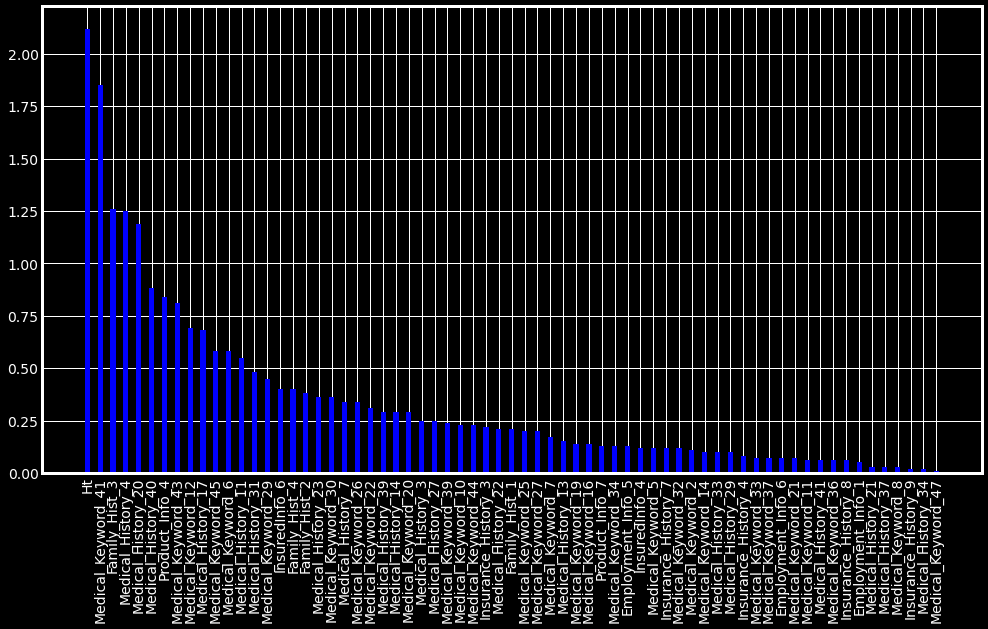

In [40]:
# Plotting feature vs importance
fig = plt.figure(figsize = (15, 8))

values =importance_df_lr[importance_df_lr['Feature Importance']>0]['Feature Importance'].values

features = importance_df_lr[importance_df_lr['Feature Importance']>0]['Feature'].values

plt.bar(features, values, color ='blue',
          width = 0.4)
plt.xticks( rotation='vertical')
plt.show()

#### **Conclusion**

> **And again the same pattern when doing feature importance**

## Stacked Model

In [41]:
#Building a stacked classifier
stacked_classifier = StackingClassifier(classifiers =[lr_optimal_model, xgb_optimal_model, gb_model], meta_classifier = RandomForestClassifier(), use_probas = True, use_features_in_secondary = True)

# training of stacked model
stacked_model = stacked_classifier.fit(X_train, Y_train)   


In [42]:
stacked_model, stacked_train_auc, stacked_test_auc, stacked_train_accuracy, stacked_test_accuracy, stacked_f1, stacked_precision, stacked_recall, stacked_train_log, stacked_test_log = check_scores(stacked_model, X_train, X_test )

The accuracy on train dataset is 0.9999775457505333
The accuracy on test dataset is 0.8303246665768557

Train confusion matrix:
[[29907     0]
 [    1 14627]]

Test confusion matrix:
[[8735 1250]
 [1269 3592]]

ROC on train data: 1.0
ROC on test data: 0.9043568026386422

Train log loss: 0.07649076705010179
Test log loss: 0.3954248326682585

F score is: 0.7403895702360095
Precision is: 0.7418422139611731
Recall is: 0.7389426044023863


In [44]:
# Appending all the models to estimators list
estimators = []

estimators.append(('logistic', lr_optimal_model))
estimators.append(('XGB', xgb_optimal_model))
estimators.append(('GB', gb_optimal_model))
estimators.append(('rf', rf_optimal_model))

# create the voting model
voting_model = VotingClassifier(estimators, voting='soft')

voting_model.fit(X_train, Y_train)


VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=10, max_iter=5000)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importanc...
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=10, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('GB',
                              GradientBoostingClassifier(max_depth=5,
                                                         n_estimators=250)),
                             ('rf',
                              RandomForestClassifier(max_depth=8,
                                                     min_samples_leaf=40,
                                                     min_samples_split=50,
                                                     n_estimators=50))],
                 voting='soft')

In [46]:
# Getting all the scores and errors
voting_model, voting_train_auc, voting_test_auc, voting_train_accuracy, voting_test_accuracy, voting_f1, voting_precision, voting_recall, voting_train_log, voting_test_log = check_scores(voting_model, X_train, X_test )

The accuracy on train dataset is 0.838845851577411
The accuracy on test dataset is 0.8284386366698101

Train confusion matrix:
[[26510  3397]
 [ 3780 10848]]

Test confusion matrix:
[[8814 1171]
 [1376 3485]]

ROC on train data: 0.9175825333805967
ROC on test data: 0.904143769655718

Train log loss: 0.3583553184664291
Test log loss: 0.375288484307866

F score is: 0.7323736471577178
Precision is: 0.7484965635738832
Recall is: 0.7169306727010903


## Models and Their Accuracies

In [48]:
# Making a dataframe of all the scores for every model

scores_ = [("Random Forest", rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_train_log, rf_test_log,rf_f1, rf_precision, rf_recall),
("Gradient Boosting",  gb_train_auc, gb_test_auc, gb_train_accuracy, gb_test_accuracy,gb_train_log, gb_test_log,gb_f1, gb_precision,gb_recall,),
("XG Boost", xgb_train_auc, xgb_test_auc, xgb_train_accuracy, xgb_test_accuracy,xgb_train_log, xgb_test_log,xgb_f1, xgb_precision, xgb_recall),
("Logistic Regression", lr_train_auc, lr_test_auc, lr_train_accuracy, lr_test_accuracy,lr_train_log, lr_test_log,lr_f1, lr_precision, lr_recall,),
("Voting Classifier", voting_train_auc, voting_test_auc, voting_train_accuracy, voting_test_accuracy, voting_train_log, voting_test_log, voting_f1, voting_precision, voting_recall),
("Stacked Model", stacked_train_auc, stacked_test_auc, stacked_train_accuracy, stacked_test_accuracy, stacked_train_log, stacked_test_log, stacked_f1, stacked_precision, stacked_recall)]

Scores_ =pd.DataFrame(data = scores_, columns=['Model Name', 'Train ROC', 'Test ROC', 'Train Accuracy', 'Test Accuracy', 'Train Log Loss','Test Log Loss','F-Score', 'Precision','Recall',])
Scores_.set_index('Model Name', inplace = True)

Scores_


Train ROC  Test ROC  Train Accuracy  Test Accuracy  \
Model Name                                                                
Random Forest         0.891712  0.885196        0.810486       0.804796   
Gradient Boosting     0.938053  0.909517        0.864915       0.835444   
XG Boost              0.907071  0.901588        0.830673       0.825273   
Logistic Regression   0.885347  0.881343        0.813540       0.810117   
Voting Classifier     0.917583  0.904144        0.838846       0.828439   
Stacked Model         1.000000  0.904357        0.999978       0.830325   

                     Train Log Loss  Test Log Loss   F-Score  Precision  \
Model Name                                                                
Random Forest              0.425858       0.430409  0.667279   0.755001   
Gradient Boosting          0.302891       0.353392  0.749974   0.746232   
XG Boost                   0.360219       0.368680  0.739715   0.722037   
Logistic Regression        0.395547       0.400941  0.701535   0.722731   
Voting Classifier          0.358355       0.375288  0.732374   0.748497   
Stacked Model              0.076491       0.395425  0.740390   0.741842   

                       Recall  
Model Name                     
Random Forest        0.597819  
Gradient Boosting    0.753754  
XG Boost             0.758280  
Logistic Regression  0.681547  
Voting Classifier    0.716931  
Stacked Model        0.738943

# **Final Results**

> **Gradient Boosting, Voting Classifier and Stacked models are performing really well. Their train and test errors and also the roc scores and f scores are really close and good.**

# Outcomes and Fairness Analysis

## Accuracy and Fairness Metrics

In [49]:
!pip install plotly

In [50]:
import numpy as np
import pandas as pd

#Import Plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import iplot
import plotly.figure_factory as ff

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats


# Regression Modeling
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Other Libraries
import warnings
warnings.filterwarnings("ignore")

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler


from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.preprocessing import CorrelationRemover
from fairlearn.adversarial import AdversarialFairnessClassifier
from fairlearn.metrics import MetricFrame
import fairlearn.datasets as fdata
from fairlearn.metrics import (demographic_parity_difference, demographic_parity_ratio, 
                               selection_rate_difference, false_negative_rate_difference, 
                               false_positive_rate_difference, equalized_odds_ratio,
                               false_negative_rate, false_positive_rate)
import xgboost
from xgboost import plot_importance
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import lime
import lime.lime_tabular
from lime import submodular_pick

In [51]:
import pandas as pd
new_df = insurance_df.copy()
new_df['Modified_Response'] = np.where(new_df['Modified_Response'] > new_df['Modified_Response'].median(), 1, 0)

In [52]:
new_df

Product_Info_1  Product_Info_3  Product_Info_4  Product_Info_5  \
Id                                                                      
2                   1              10        0.076923               2   
5                   1              26        0.076923               2   
6                   1              26        0.076923               2   
7                   1              10        0.487179               2   
8                   1              26        0.230769               2   
...               ...             ...             ...             ...   
79142               1              10        0.230769               2   
79143               1              26        0.230769               2   
79144               1              26        0.076923               2   
79145               1              10        0.230769               2   
79146               1              26        0.076923               2   

       Product_Info_6  Product_Info_7   Ins_Age        Ht        Wt       BMI  \
Id                                                                              
2                   1               1  0.641791  0.581818  0.148536  0.323008   
5                   3               1  0.059701  0.600000  0.131799  0.272288   
6                   3               1  0.029851  0.745455  0.288703  0.428780   
7                   3               1  0.164179  0.672727  0.205021  0.352438   
8                   3               1  0.417910  0.654545  0.234310  0.424046   
...               ...             ...       ...       ...       ...       ...   
79142               3               1  0.074627  0.709091  0.320084  0.519103   
79143               3               1  0.432836  0.800000  0.403766  0.551119   
79144               3               1  0.104478  0.745455  0.246862  0.360969   
79145               3               1  0.507463  0.690909  0.276151  0.462452   
79146               3               1  0.447761  0.781818  0.382845  0.539563   

       Employment_Info_1  Employment_Info_2  Employment_Info_3  \
Id                                                               
2                  0.028                 12                  1   
5                  0.000                  1                  3   
6                  0.030                  9                  1   
7                  0.042                  9                  1   
8                  0.027                  9                  1   
...                  ...                ...                ...   
79142              0.020                  1                  3   
79143              0.100                  9                  1   
79144              0.035                  9                  1   
79145              0.038                  9                  1   
79146              0.123                  9                  1   

       Employment_Info_4  Employment_Info_5  Employment_Info_6  InsuredInfo_1  \
Id                                                                              
2                0.00000                  3                NaN              1   
5                0.00000                  2             0.0018              1   
6                0.00000                  2             0.0300              1   
7                0.00000                  3             0.2000              2   
8                0.00000                  2             0.0500              1   
...                  ...                ...                ...            ...   
79142            0.00000                  3             0.0250              1   
79143            0.00001                  2             0.3500              1   
79144            0.00000                  2                NaN              1   
79145                NaN                  3                NaN              1   
79146                NaN                  2             0.3000              1   

       InsuredInfo_2  InsuredInfo_3  InsuredInfo_4  InsuredInfo_5  \
Id                   

### Sensitive Features 1 - BMI

In [66]:
#measuring BMI, target Medical keyword
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import numpy as np

# Define the sensitive feature
sensitive_feature = 'BMI'

In [69]:
# < 18.5 = underweight
# 18.5-25 = healthy
# 25-30 = overweight
# 30+ = obese

# Define the sensitive feature groups
df_bmi = new_df.copy()
df_bmi = df_bmi.fillna(df_bmi.mean())
underweight = df_bmi.loc[(df_bmi['BMI'] < 18.5/50)]
healthy = df_bmi.loc[(df_bmi['BMI'] >= 18.5/50) & (df_bmi['BMI'] < 25/50)]
overweight = df_bmi.loc[(df_bmi['BMI'] >= 25/50) & (df_bmi['BMI'] < 30/50)]
obese = df_bmi.loc[df_bmi['BMI'] > 30/50]

In [71]:
df_bmi

Product_Info_1  Product_Info_3  Product_Info_4  Product_Info_5  \
Id                                                                      
2                   1              10        0.076923               2   
5                   1              26        0.076923               2   
6                   1              26        0.076923               2   
7                   1              10        0.487179               2   
8                   1              26        0.230769               2   
...               ...             ...             ...             ...   
79142               1              10        0.230769               2   
79143               1              26        0.230769               2   
79144               1              26        0.076923               2   
79145               1              10        0.230769               2   
79146               1              26        0.076923               2   

       Product_Info_6  Product_Info_7   Ins_Age        Ht        Wt       BMI  \
Id                                                                              
2                   1               1  0.641791  0.581818  0.148536  0.323008   
5                   3               1  0.059701  0.600000  0.131799  0.272288   
6                   3               1  0.029851  0.745455  0.288703  0.428780   
7                   3               1  0.164179  0.672727  0.205021  0.352438   
8                   3               1  0.417910  0.654545  0.234310  0.424046   
...               ...             ...       ...       ...       ...       ...   
79142               3               1  0.074627  0.709091  0.320084  0.519103   
79143               3               1  0.432836  0.800000  0.403766  0.551119   
79144               3               1  0.104478  0.745455  0.246862  0.360969   
79145               3               1  0.507463  0.690909  0.276151  0.462452   
79146               3               1  0.447761  0.781818  0.382845  0.539563   

       Employment_Info_1  Employment_Info_2  Employment_Info_3  \
Id                                                               
2                  0.028                 12                  1   
5                  0.000                  1                  3   
6                  0.030                  9                  1   
7                  0.042                  9                  1   
8                  0.027                  9                  1   
...                  ...                ...                ...   
79142              0.020                  1                  3   
79143              0.100                  9                  1   
79144              0.035                  9                  1   
79145              0.038                  9                  1   
79146              0.123                  9                  1   

       Employment_Info_4  Employment_Info_5  Employment_Info_6  InsuredInfo_1  \
Id                                                                              
2               0.000000                  3           0.361469              1   
5               0.000000                  2           0.001800              1   
6               0.000000                  2           0.030000              1   
7               0.000000                  3           0.200000              2   
8               0.000000                  2           0.050000              1   
...                  ...                ...                ...            ...   
79142           0.000000                  3           0.025000              1   
79143           0.000010                  2           0.350000              1   
79144           0.000000                  2           0.361469              1   
79145           0.006283                  3           0.361469              1   
79146           0.006283                  2           0.300000              1   

       InsuredInfo_2  InsuredInfo_3  InsuredInfo_4  InsuredInfo_5  \
Id                   

In [72]:
# Create a new column 'bin' to indicate which group each record belongs to
# new_df['bin'] = pd.cut(new_df[sensitive_feature], [float('-inf'), min_bmi, max_bmi, float('inf')], labels=[0, 1, 2])

# Split the data into training and testing sets
X_train_bmi, X_test_bmi, y_train_bmi, y_test_bmi = train_test_split(df_bmi.drop(['Modified_Response'], axis=1), new_df['Modified_Response'], test_size=0.2, random_state=42)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(underweight.drop(['Modified_Response'], axis=1), underweight['Modified_Response'], test_size=0.2, random_state=42)
X_train_health, X_test_health, y_train_health, y_test_health = train_test_split(healthy.drop(['Modified_Response'], axis=1), healthy['Modified_Response'], test_size=0.2, random_state=42)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(overweight.drop(['Modified_Response'], axis=1), overweight['Modified_Response'], test_size=0.2, random_state=42)
X_train_obese, X_test_obese, y_train_obese, y_test_obese = train_test_split(obese.drop(['Modified_Response'], axis=1), obese['Modified_Response'], test_size=0.2, random_state=42)

In [73]:
# Train a random forest classifier on the entire dataset
rfc_bmi = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
rfc_under = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
rfc_healthy = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
rfc_over = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
rfc_obese = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)

rfc_bmi.fit(X_train_bmi, y_train_bmi)
rfc_under.fit(X_train_under, y_train_under)
rfc_healthy.fit(X_train_health, y_train_health)
rfc_over.fit(X_train_over, y_train_over)
rfc_obese.fit(X_train_obese, y_train_obese)

# Evaluate the model performance on the entire test set
y_pred_bmi = rfc_bmi.predict(X_test_bmi)
y_pred_under = rfc_under.predict(X_test_under)
y_pred_healthy = rfc_healthy.predict(X_test_health)
y_pred_over = rfc_over.predict(X_test_over)
y_pred_obese = rfc_obese.predict(X_test_obese)

In [76]:
# Evaluate the model performance on the entire test set
accuracy_bmi = accuracy_score(y_test_bmi, y_pred_bmi)
precision_bmi = precision_score(y_test_bmi, y_pred_bmi)
recall_bmi = recall_score(y_test_bmi, y_pred_bmi)
tn, fp, fn, tp = confusion_matrix(y_test_bmi, y_pred_bmi).ravel()
fpr_bmi = fp / (fp + tn)
fnr_bmi = fn / (fn + tp)
fnr_diff_bmi = false_negative_rate_difference(y_true = y_test_bmi, y_pred = y_pred_bmi, sensitive_features = X_test_bmi['BMI'])
fpr_diff_bmi = false_positive_rate_difference(y_true = y_test_bmi, y_pred = y_pred_bmi, sensitive_features = X_test_bmi['BMI'])
dpr_bmi = demographic_parity_ratio(y_true = y_test_bmi, y_pred = y_pred_bmi, sensitive_features = X_test_bmi['BMI'])
eor_bmi = equalized_odds_ratio(y_true = y_test_bmi, y_pred = y_pred_bmi, sensitive_features = X_test_bmi['BMI'])
sr_diff_bmi = selection_rate_difference(y_true = y_test_bmi, y_pred = y_pred_bmi, sensitive_features = X_test_bmi['BMI'])

In [77]:
# Evaluate the model performance on the underweight test set
accuracy_under = accuracy_score(y_test_under, y_pred_under)
precision_under = precision_score(y_test_under, y_pred_under)
recall_under = recall_score(y_test_under, y_pred_under)
tn, fp, fn, tp = confusion_matrix(y_test_under, y_pred_under).ravel()
fpr_under = fp / (fp + tn)
fnr_under = fn / (fn + tp)

In [78]:
# Evaluate the model performance on the healthy test set
accuracy_healthy = accuracy_score(y_test_health, y_pred_healthy)
precision_healthy = precision_score(y_test_health, y_pred_healthy)
recall_healthy = recall_score(y_test_health, y_pred_healthy)
tn, fp, fn, tp = confusion_matrix(y_test_health, y_pred_healthy).ravel()
fpr_healthy = fp / (fp + tn)
fnr_healthy = fn / (fn + tp)

In [79]:
# Evaluate the model performance on the overweight test set
accuracy_over = accuracy_score(y_test_over, y_pred_over)
precision_over = precision_score(y_test_over, y_pred_over)
recall_over = recall_score(y_test_over, y_pred_over)
tn, fp, fn, tp = confusion_matrix(y_test_over, y_pred_over).ravel()
fpr_over = fp / (fp + tn)
fnr_over = fn / (fn + tp)

In [80]:
# Evaluate the model performance on the obese test set
accuracy_obese = accuracy_score(y_test_obese, y_pred_obese)
precision_obese = precision_score(y_test_obese, y_pred_obese)
recall_obese = recall_score(y_test_obese, y_pred_obese)
tn, fp, fn, tp = confusion_matrix(y_test_obese, y_pred_obese).ravel()
fpr_obese = fp / (fp + tn)
fnr_obese = fn / (fn + tp)

In [81]:
print("BMI Test Set")
print("-"*20)
print(f"Accuracy on BMI test set: {accuracy_bmi}")
print(f"Precision on BMI test set: {precision_bmi}")
print(f"Recall on BMI test set: {recall_bmi}")
print(f"FPR on BMI test set: {fpr_bmi}")
print(f"FNR on BMI test set: {fnr_bmi}")
print(f"FNR Difference on BMI test set: {fnr_diff_bmi}")
print(f"FPR Difference on BMI test set: {fpr_diff_bmi}")
print(f"Demographic Parity Ratio on BMI test set: {dpr_bmi}")
print(f"Equalized Odds Ratio on BMI test set: {eor_bmi}")
print(f"Selection Rate Difference on BMI test set: {sr_diff_bmi}")
print("-"*20)
print("")

print("Underweight Test Set")
print("-"*20)
print(f"Accuracy on Underweight test set: {accuracy_under}")
print(f"Precision on Underweight test set: {precision_under}")
print(f"Recall on Underweight test set: {recall_under}")
print(f"FPR on Underweight test set: {fpr_under}")
print(f"FNR on Underweight test set: {fnr_under}")
print("-"*20)
print("")

print("Healthy Test Set")
print("-"*20)
print(f"Accuracy on Healthy test set: {accuracy_healthy}")
print(f"Precision on Healthy test set: {precision_healthy}")
print(f"Recall on Healthy test set: {recall_healthy}")
print(f"FPR on Healthy test set: {fpr_healthy}")
print(f"FNR on Healthy test set: {fnr_healthy}")
print("-"*20)
print("")

print("Overweight Test Set")
print("-"*20)
print(f"Accuracy on Overweight test set: {accuracy_over}")
print(f"Precision on Overweight test set: {precision_over}")
print(f"Recall on Overweight test set: {recall_over}")
print(f"FPR on Overweight test set: {fpr_over}")
print(f"FNR on Overweight test set: {fnr_over}")
print("-"*20)
print("")

print("Obese Test Set")
print("-"*20)
print(f"Accuracy on Obese test set: {accuracy_obese}")
print(f"Precision on Obese test set: {precision_obese}")
print(f"Recall on Obese test set: {recall_obese}")
print(f"FPR on Obese test set: {fpr_obese}")
print(f"FNR on Obese test set: {fnr_obese}")
print("-"*20)

BMI Test Set
--------------------
Accuracy on BMI test set: 0.8177991075187336
Precision on BMI test set: 0.7497041420118343
Recall on BMI test set: 0.657840083073728
FPR on BMI test set: 0.10542056074766355
FNR on BMI test set: 0.34215991692627207
FNR Difference on BMI test set: 1.0
FPR Difference on BMI test set: 1.0
Demographic Parity Ratio on BMI test set: 0.0
Equalized Odds Ratio on BMI test set: 0.0
Selection Rate Difference on BMI test set: 1.0
--------------------

Underweight Test Set
--------------------
Accuracy on Underweight test set: 0.788549937317175
Precision on Underweight test set: 0.7863346844238563
Recall on Underweight test set: 0.9083612040133779
FPR on Underweight test set: 0.410913140311804
FNR on Underweight test set: 0.09163879598662207
--------------------

Healthy Test Set
--------------------
Accuracy on Healthy test set: 0.7527986786566342
Precision on Healthy test set: 0.7195121951219512
Recall on Healthy test set: 0.6719229084537889
FPR on Healthy test s

### Sensitive Feature 2 - Age

In [85]:
# Define the sensitive feature groups
df_age = new_df.copy()
df_age = df_age.fillna(df_age.mean())
underage = df_age.loc[(df_age['Ins_Age'] < 18/100)]
young_adult = df_age.loc[(df_age['Ins_Age'] >= 18/100) & (df_age['Ins_Age'] < 30/100)]
old_adult = df_age.loc[(df_age['Ins_Age'] >= 30/100) & (df_age['Ins_Age'] < 65/100)]
elderly = df_age.loc[df_age['Ins_Age'] >= 65/100]

In [86]:
# Split the data into training and testing sets
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(df_age.drop(['Modified_Response'], axis=1), df_age['Modified_Response'], test_size=0.2, random_state=42)
X_train_underage, X_test_underage, y_train_underage, y_test_underage = train_test_split(underage.drop(['Modified_Response'], axis=1), underage['Modified_Response'], test_size=0.2, random_state=42)
X_train_young, X_test_young, y_train_young, y_test_young = train_test_split(young_adult.drop(['Modified_Response'], axis=1), young_adult['Modified_Response'], test_size=0.2, random_state=42)
X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(old_adult.drop(['Modified_Response'], axis=1), old_adult['Modified_Response'], test_size=0.2, random_state=42)
X_train_elderly, X_test_elderly, y_train_elderly, y_test_elderly = train_test_split(elderly.drop(['Modified_Response'], axis=1), elderly['Modified_Response'], test_size=0.2, random_state=42)

In [87]:
# Train a random forest classifier on the entire dataset
rfc_age = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
rfc_underage = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
rfc_young = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
rfc_old = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
rfc_elderly = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)

rfc_age.fit(X_train_age, y_train_age)
rfc_underage.fit(X_train_underage, y_train_underage)
rfc_young.fit(X_train_young, y_train_young)
rfc_old.fit(X_train_old, y_train_old)
rfc_elderly.fit(X_train_elderly, y_train_elderly)

# Evaluate the model performance on the entire test set
y_pred_age = rfc_age.predict(X_test_age)
y_pred_underage = rfc_underage.predict(X_test_underage)
y_pred_young = rfc_young.predict(X_test_young)
y_pred_old = rfc_old.predict(X_test_old)
y_pred_elderly = rfc_elderly.predict(X_test_elderly)

In [88]:
# Evaluate the model performance on the entire test set
accuracy_age = accuracy_score(y_test_age, y_pred_age)
precision_age = precision_score(y_test_age, y_pred_age)
recall_age = recall_score(y_test_age, y_pred_age)
tn, fp, fn, tp = confusion_matrix(y_test_age, y_pred_age).ravel()
fpr_age = fp / (fp + tn)
fnr_age = fn / (fn + tp)
fnr_diff_age = false_negative_rate_difference(y_true = y_test_age, y_pred = y_pred_age, sensitive_features = X_test_age['Ins_Age'])
fpr_diff_age = false_positive_rate_difference(y_true = y_test_age, y_pred = y_pred_age, sensitive_features = X_test_age['Ins_Age'])
dpr_age = demographic_parity_ratio(y_true = y_test_age, y_pred = y_pred_age, sensitive_features = X_test_age['Ins_Age'])
eor_age = equalized_odds_ratio(y_true = y_test_age, y_pred = y_pred_age, sensitive_features = X_test_age['Ins_Age'])
sr_diff_age = selection_rate_difference(y_true = y_test_age, y_pred = y_pred_age, sensitive_features = X_test_age['Ins_Age'])

In [89]:
# Evaluate the model performance on the underage test set
accuracy_underage = accuracy_score(y_test_underage, y_pred_underage)
precision_underage = precision_score(y_test_underage, y_pred_underage)
recall_underage = recall_score(y_test_underage, y_pred_underage)
tn, fp, fn, tp = confusion_matrix(y_test_underage, y_pred_underage).ravel()
fpr_underage = fp / (fp + tn)
fnr_underage = fn / (fn + tp)

In [90]:
# Evaluate the model performance on the young adult test set
accuracy_young = accuracy_score(y_test_young, y_pred_young)
precision_young = precision_score(y_test_young, y_pred_young)
recall_young = recall_score(y_test_young, y_pred_young)
tn, fp, fn, tp = confusion_matrix(y_test_young, y_pred_young).ravel()
fpr_young = fp / (fp + tn)
fnr_young = fn / (fn + tp)

In [91]:
# Evaluate the model performance on the old adult test set
accuracy_old = accuracy_score(y_test_old, y_pred_old)
precision_old = precision_score(y_test_old, y_pred_old)
recall_old = recall_score(y_test_old, y_pred_old)
tn, fp, fn, tp = confusion_matrix(y_test_old, y_pred_old).ravel()
fpr_old = fp / (fp + tn)
fnr_old = fn / (fn + tp)

In [92]:
# Evaluate the model performance on the elderly test set
accuracy_elderly = accuracy_score(y_test_elderly, y_pred_elderly)
precision_elderly = precision_score(y_test_elderly, y_pred_elderly)
recall_elderly = recall_score(y_test_elderly, y_pred_elderly)
tn, fp, fn, tp = confusion_matrix(y_test_elderly, y_pred_elderly).ravel()
fpr_elderly = fp / (fp + tn)
fnr_elderly = fn / (fn + tp)

In [93]:
print("Age Test Set")
print("-"*20)
print(f"Accuracy on Age test set: {accuracy_age}")
print(f"Precision on Age test set: {precision_age}")
print(f"Recall on Age test set: {recall_age}")
print(f"FPR on Age test set: {fpr_age}")
print(f"FNR on Age test set: {fnr_age}")
print("-"*20)
print(f"FNR Difference on Age test set: {fnr_diff_age}")
print(f"FPR Difference on Age test set: {fpr_diff_age}")
print(f"Demographic Parity Ratio on Age test set: {dpr_age}")
print(f"Equalized Odds Ratio on Age test set: {eor_age}")
print(f"Selection Rate Difference on Age test set: {sr_diff_age}")
print("-"*20)
print("")

print("Underage Test Set")
print("-"*20)
print(f"Accuracy on Underage test set: {accuracy_underage}")
print(f"Precision on Underage test set: {precision_underage}")
print(f"Recall on Underage test set: {recall_underage}")
print(f"FPR on Underage test set: {fpr_underage}")
print(f"FNR on Underage test set: {fnr_underage}")
print("-"*20)
print("")

print("Young Adult Test Set")
print("-"*20)
print(f"Accuracy on Young Adult test set: {accuracy_young}")
print(f"Precision on Young Adult test set: {precision_young}")
print(f"Recall on Young Adult test set: {recall_young}")
print(f"FPR on Young Adult test set: {fpr_young}")
print(f"FNR on Young Adult test set: {fnr_young}")
print("-"*20)
print("")

print("Old Adult Test Set")
print("-"*20)
print(f"Accuracy on Old Adult test set: {accuracy_old}")
print(f"Precision on Old Adult test set: {precision_old}")
print(f"Recall on Old Adult test set: {recall_old}")
print(f"FPR on Old Adult test set: {fpr_old}")
print(f"FNR on Old Adult test set: {fnr_old}")
print("-"*20)
print("")

print("Elderly Test Set")
print("-"*20)
print(f"Accuracy on Elderly test set: {accuracy_elderly}")
print(f"Precision on Elderly test set: {precision_elderly}")
print(f"Recall on Elderly test set: {recall_elderly}")
print(f"FPR on Elderly test set: {fpr_elderly}")
print(f"FNR on Elderly test set: {fnr_elderly}")
print("-"*20)

Age Test Set
--------------------
Accuracy on Age test set: 0.8177991075187336
Precision on Age test set: 0.7497041420118343
Recall on Age test set: 0.657840083073728
FPR on Age test set: 0.10542056074766355
FNR on Age test set: 0.34215991692627207
--------------------
FNR Difference on Age test set: 1.0
FPR Difference on Age test set: 0.25
Demographic Parity Ratio on Age test set: 0.0
Equalized Odds Ratio on Age test set: 0.0
Selection Rate Difference on Age test set: 0.640625
--------------------

Underage Test Set
--------------------
Accuracy on Underage test set: 0.8343848580441641
Precision on Underage test set: 0.8109756097560976
Recall on Underage test set: 0.86084142394822
FPR on Underage test set: 0.19076923076923077
FNR on Underage test set: 0.13915857605177995
--------------------

Young Adult Test Set
--------------------
Accuracy on Young Adult test set: 0.8092715231788079
Precision on Young Adult test set: 0.7556701030927835
Recall on Young Adult test set: 0.789870689655

## Performance Analysis (LIME and SHAP)

### LIME/SHAP on ADS 1 (Random Forest)

In [94]:
# Interpretting the model using lime
interpret_with_lime(rf_model,X_test)

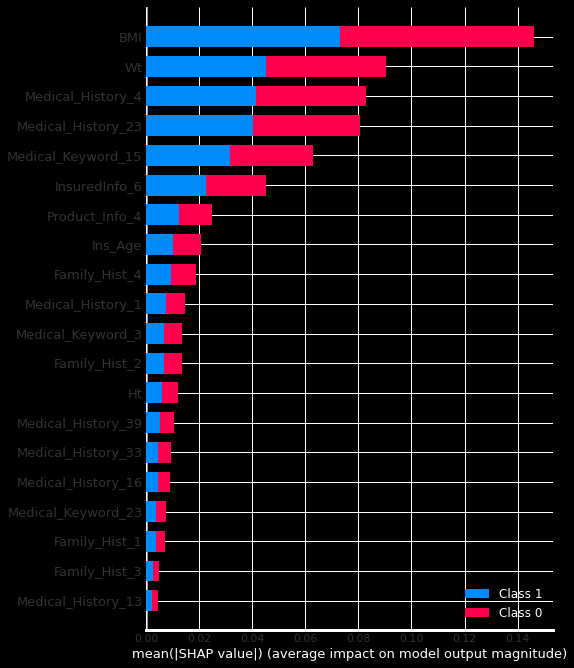

In [95]:
# Interpretting the model using shaply
X_shap = X_train

rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer.shap_values(X_shap)
shap.summary_plot(rf_shap_values, X_shap, plot_type="bar")

> Medical keyword 15,medical history 9,  Wt, medical history 3 all pushing towards 1.

> Orange ones are pushing towards 1.

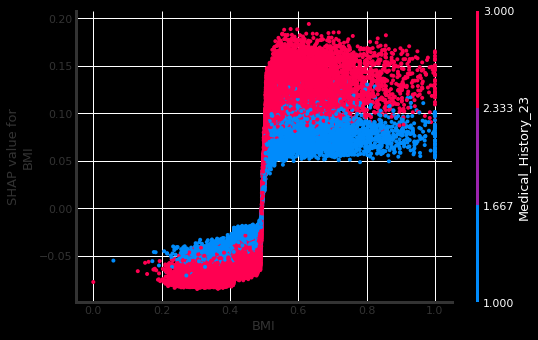

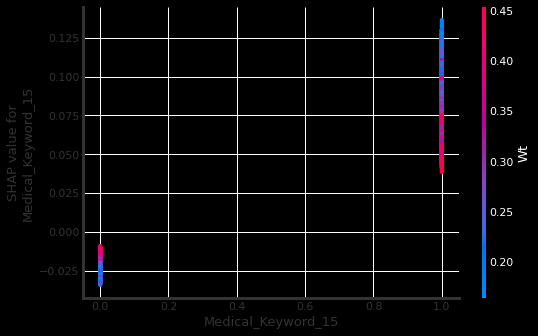

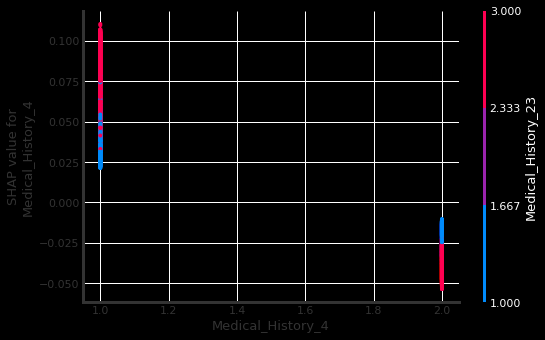

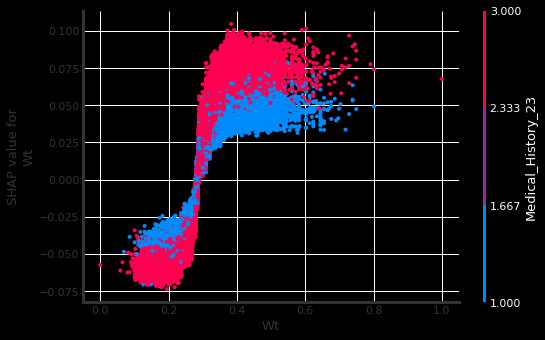

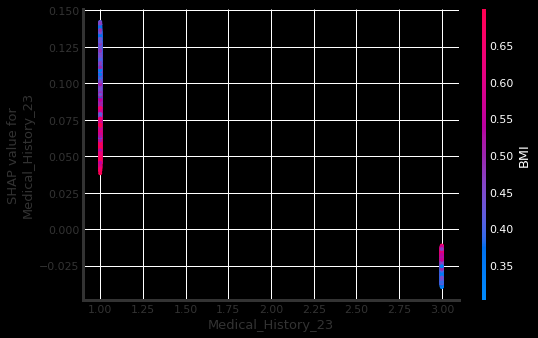

In [96]:
# Plotting for top 5 features
top_vars = ['BMI','Medical_Keyword_15','Medical_History_4','Wt','Medical_History_23']
index_top_vars =[list(X_train.columns).index(var) for var in top_vars]

for elem in index_top_vars:
    shap.dependence_plot(elem, rf_shap_values[0], X_train)

> With high medical history 23 and low bmi we get class 1

### LIME/SHAP on ADS 2 (Gradient Boosting)

In [97]:
# Interpretting the model using lime
interpret_with_lime(gb_model,X_test)

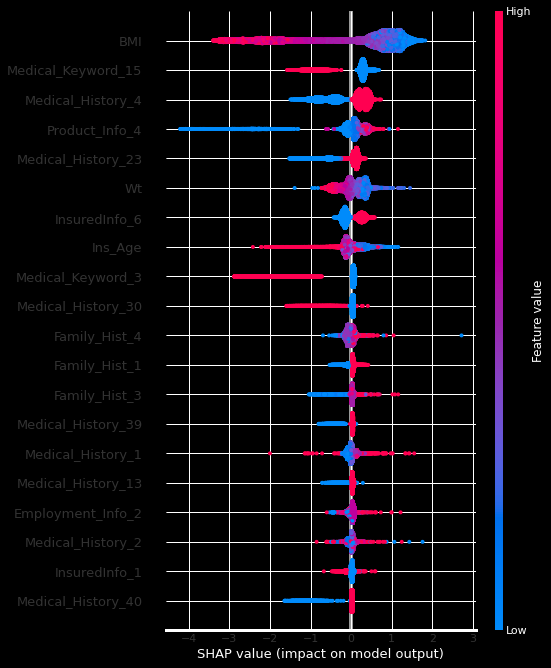

In [98]:
# Interpretting the model using shaply
X_shap = X_train

gb_explainer = shap.TreeExplainer(gb_model)
gb_shap_values = gb_explainer.shap_values(X_shap)
shap.summary_plot(gb_shap_values, X_shap, plot_type="dot")

> BMI is pushing models prediction towards 0.

>Medical keyword 15 is pushing towards 1. However, medical keyword 4 is pushing towards 0.

> Also, according to feature plot Wt. was in top 5 most important features, same isn't followed here.

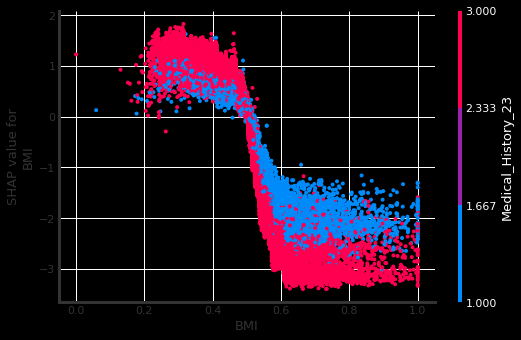

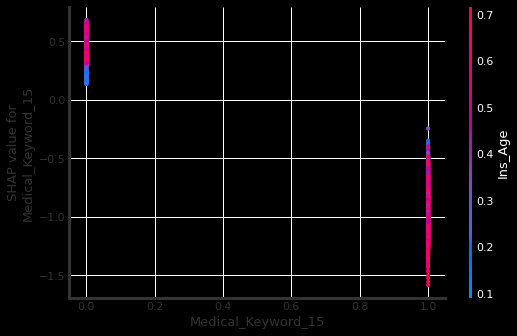

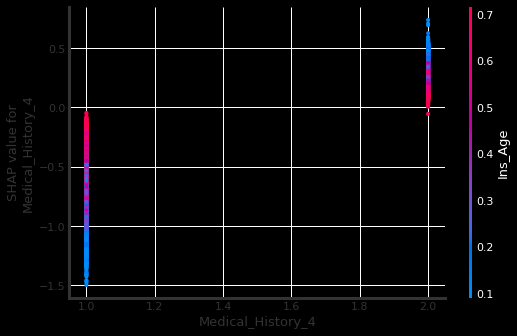

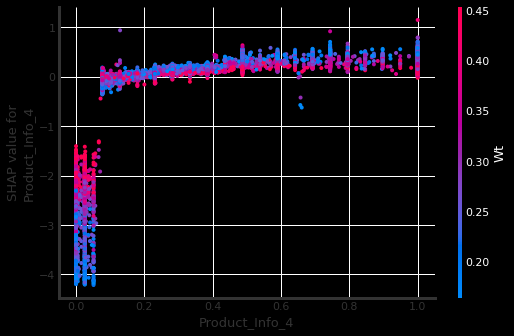

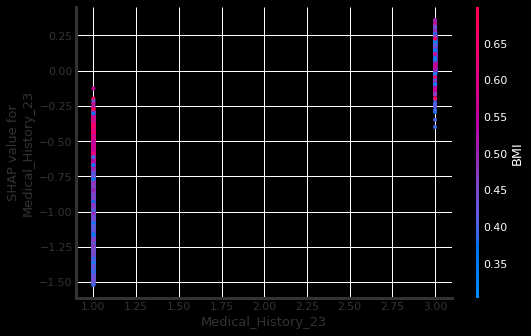

In [99]:
#Plotting for top 5 features
top_vars = ['BMI','Medical_Keyword_15','Medical_History_4','Product_Info_4','Medical_History_23']
index_top_vars =[list(X_train.columns).index(var) for var in top_vars]

for elem in index_top_vars:
    shap.dependence_plot(elem, gb_shap_values, X_train)

### **Findings**

> For low BMI and high medical history 23 we get class as 1.

### LIME/SHAP on ADS 3 (XGBoost)

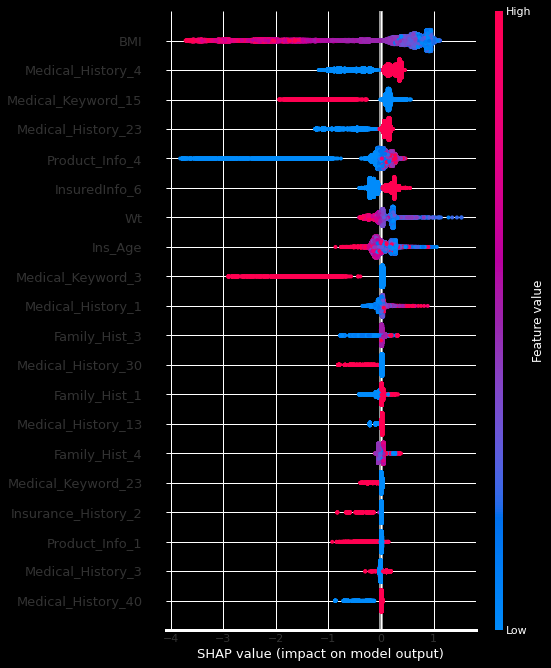

In [100]:
# Interpretting the model using shaply

xgb_explainer = shap.TreeExplainer(xgb_model)
xgb_shap_values = xgb_explainer.shap_values(X_shap)
shap.summary_plot(xgb_shap_values, X_shap, plot_type="dot")

> Again BMI is pushing towards class 0.

> Medical history 4 pushing towards class 1.

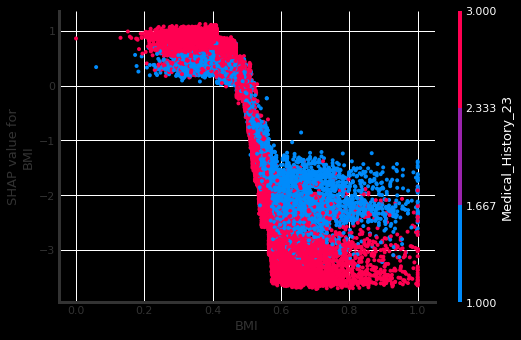

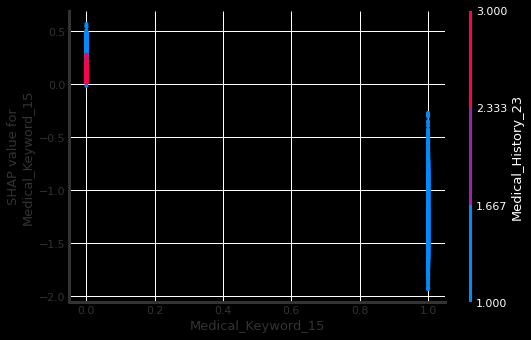

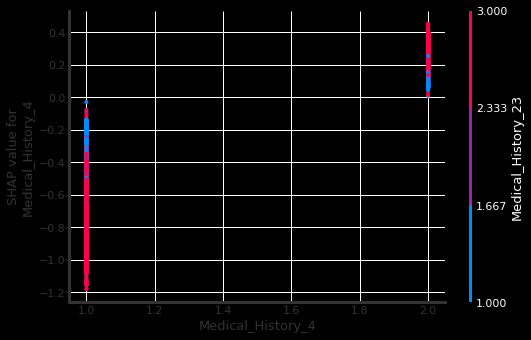

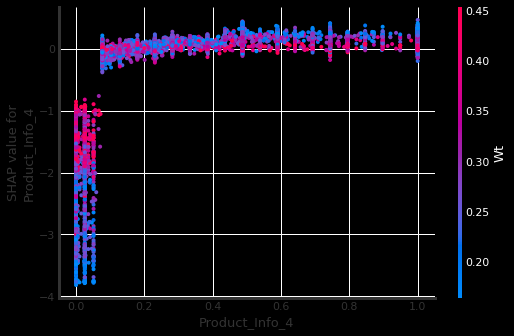

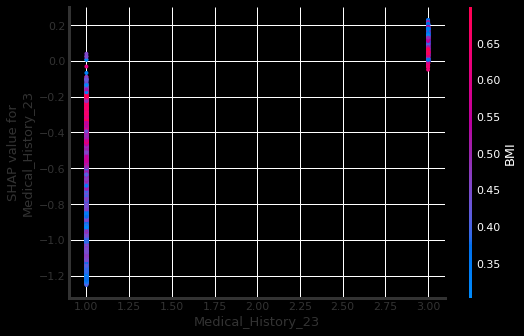

In [101]:
#Plotting for top 5 features
top_vars = ['BMI','Medical_Keyword_15','Medical_History_4','Product_Info_4','Medical_History_23']
index_top_vars =[list(X_train.columns).index(var) for var in top_vars]

for elem in index_top_vars:
    shap.dependence_plot(elem, xgb_shap_values, X_train)